In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

In [3]:
locs_1 = pd.read_csv("../Data/Loc_Sample/GPS_20946596.csv")

locs_2 = pd.read_csv("../Data/Loc_Sample/GPS_28878128.csv")

locs_3 = pd.read_csv("../Data/Loc_Sample/GPS_89242282.csv")

locs_4 = pd.read_csv("../Data/Loc_Sample/GPS_95983626.csv")


FileNotFoundError: [Errno 2] File b'../Data/Loc_Sample/GPS_20946596.csv' does not exist: b'../Data/Loc_Sample/GPS_20946596.csv'

In [6]:
locs.head()

,timestamp,latitude,longitude
0,2017.09.05_17.36.27,36.367136,127.364432
1,2017.09.05_17.36.40,36.367136,127.364432
2,2017.09.05_17.37.11,36.367153,127.364536
3,2017.09.05_17.38.09,36.367153,127.364536
4,2017.09.05_17.39.17,36.367153,127.364536


In [7]:
#locs[' latitude']

In [8]:
#locs[' longitude']

In [9]:
loc_array = locs[['timestamp', ' latitude',' longitude']]

In [10]:
loc_array.head()

,timestamp,latitude,longitude
0,2017.09.05_17.36.27,36.367136,127.364432
1,2017.09.05_17.36.40,36.367136,127.364432
2,2017.09.05_17.37.11,36.367153,127.364536
3,2017.09.05_17.38.09,36.367153,127.364536
4,2017.09.05_17.39.17,36.367153,127.364536


<function matplotlib.pyplot.show>

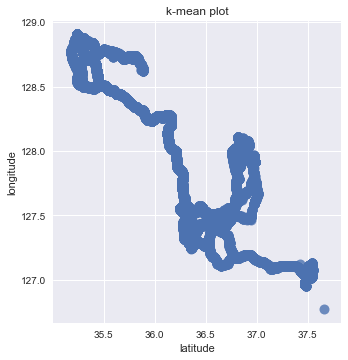

In [11]:
sns.lmplot(' latitude', ' longitude', data = loc_array, fit_reg = False, scatter_kws = {'s':100})
plt.title('k-mean plot')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show

#### K-mean clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
data_points = loc_array[[' latitude',' longitude']].values

In [18]:
data_points

array([[ 36.3671361, 127.3644319],
       [ 36.3671361, 127.3644319],
       [ 36.3671528, 127.3645363],
       ...,
       [ 35.2691449, 128.8665492],
       [ 35.268824 , 128.8654108],
       [ 35.268789 , 128.8654258]])

In [19]:
kmeans = KMeans(n_clusters=4).fit(data_points)

In [20]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
kmeans.cluster_centers_

array([[ 36.37488027, 127.3702027 ],
       [ 35.35145068, 128.74607091],
       [ 36.00460498, 128.23693906],
       [ 37.07615939, 127.59428951]])

In [22]:
loc_array['cluster_id'] = kmeans.labels_

In [23]:
loc_array.head()

,timestamp,latitude,longitude,cluster_id
0,2017.09.05_17.36.27,36.367136,127.364432,0
1,2017.09.05_17.36.40,36.367136,127.364432,0
2,2017.09.05_17.37.11,36.367153,127.364536,0
3,2017.09.05_17.38.09,36.367153,127.364536,0
4,2017.09.05_17.39.17,36.367153,127.364536,0


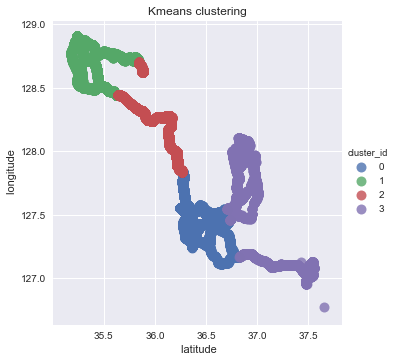

In [24]:
sns.lmplot(' latitude', ' longitude', data = loc_array, fit_reg = False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('Kmeans clustering')

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

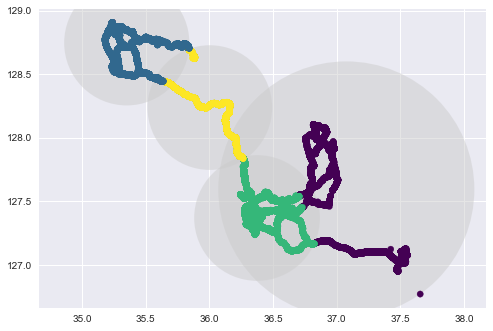

In [26]:
plot_kmeans(kmeans, data_points)

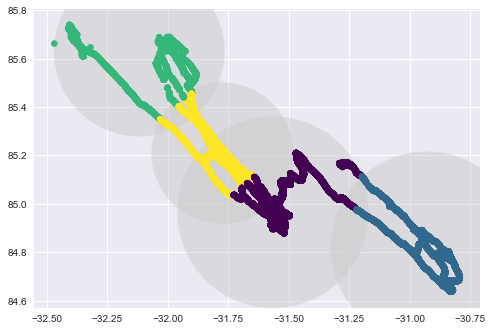

In [27]:
rng = np.random.RandomState(13)
X_stretched = np.dot(data_points, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

#### GMM

In [28]:
from sklearn.mixture import GaussianMixture

In [29]:
gmm = GaussianMixture(n_components=4).fit(data_points)
labels = gmm.predict(data_points)


In [30]:
loc_array['cluster_id'] = labels

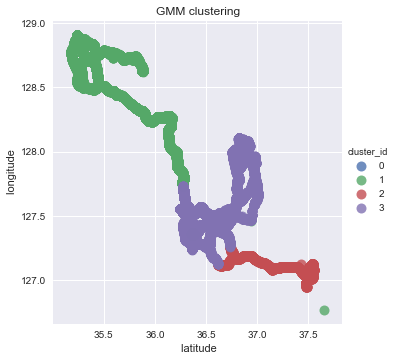

In [31]:
sns.lmplot(' latitude', ' longitude', data = loc_array, fit_reg = False, scatter_kws={'s':100}, hue='cluster_id')
plt.title('GMM clustering')

In [64]:
probs = gmm.predict_proba(data_points)
print(probs[:5].round(3))

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [32]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

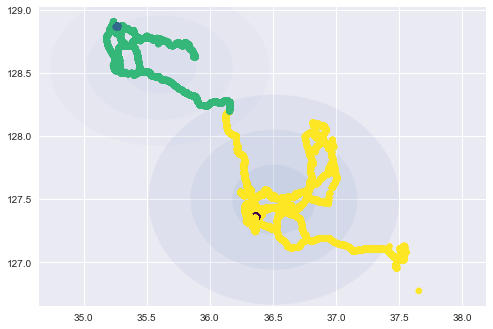

In [33]:
gmm = GaussianMixture(n_components=4, covariance_type='diag',random_state=42)
plot_gmm(gmm, data_points)

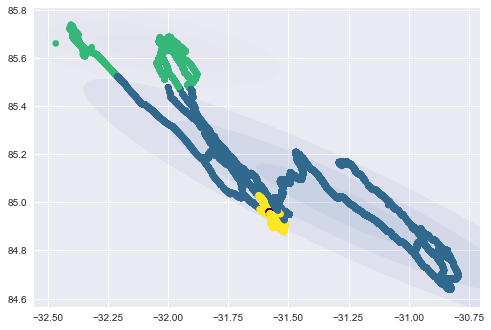

In [34]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)



#### GMM Location Labeling

- Timestamp
- latitude
- longitude
- cluster_id


(220184, 3)
(209528, 3)
(340753, 3)
(325718, 3)
(473212, 3)
(561513, 3)
(402965, 3)
(124305, 3)
(321292, 3)
(681864, 3)
(259388, 3)
(393902, 3)
(491063, 3)
(287516, 3)
(347321, 3)
(332578, 3)
(762883, 3)
(616956, 3)
(394134, 3)
(395775, 3)
(268711, 3)


C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(462695, 3)
(157672, 3)
(481897, 3)
(299761, 3)
(264342, 3)
(528358, 3)
(336512, 3)
(532337, 3)
(282747, 3)
(412828, 3)
(540996, 3)
(411357, 3)
(408456, 3)
(175695, 3)
(486308, 3)
(464491, 3)
(390352, 3)
(333369, 3)
(492485, 3)
(455133, 3)
(479626, 3)
(179147, 3)
(224295, 3)
(634792, 3)
(159726, 3)
(181585, 3)
(471285, 3)
(283086, 3)
(775962, 3)
(348722, 3)
(130206, 3)
(151286, 3)
(175720, 3)
(580934, 3)
(497591, 3)
(587135, 3)
(196452, 3)
(358354, 3)
(650653, 3)
(354358, 3)
(210855, 3)
(416892, 3)
(213648, 3)
(333475, 3)
(172653, 3)
(400630, 3)
(283356, 3)
(638797, 3)
(253829, 3)
(497422, 3)
(165818, 3)
(453772, 3)
(403737, 3)
(369111, 3)
(290669, 3)
(388155, 3)
(547697, 3)
(321081, 3)
(456194, 3)
(226052, 3)
(584040, 3)
(417096, 3)
(461954, 3)


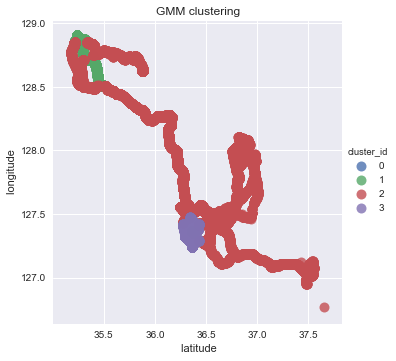

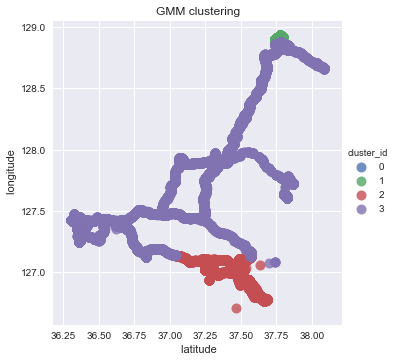

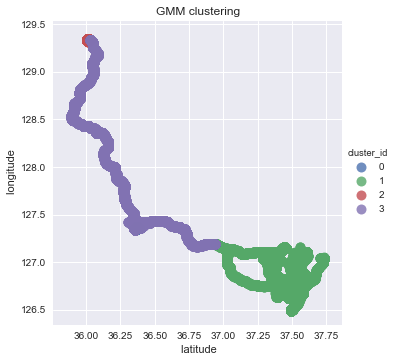

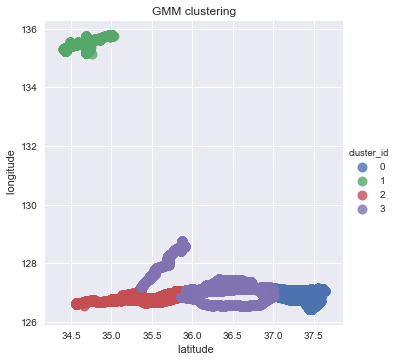

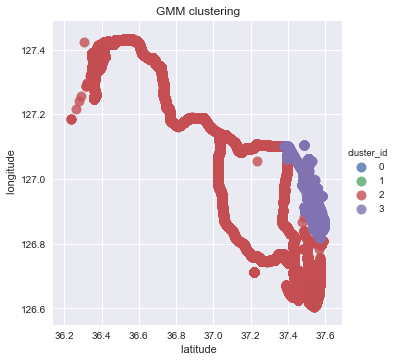

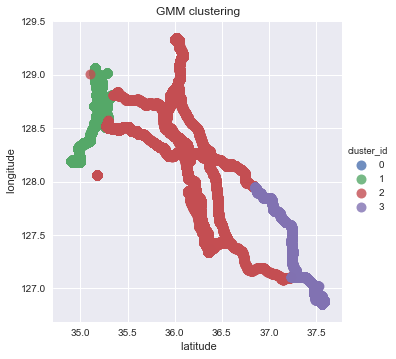

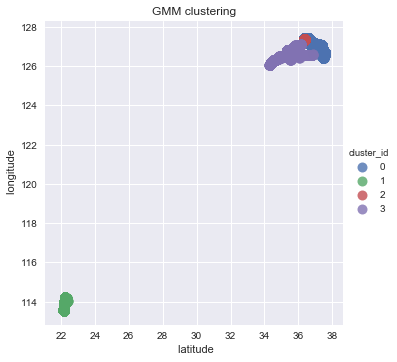

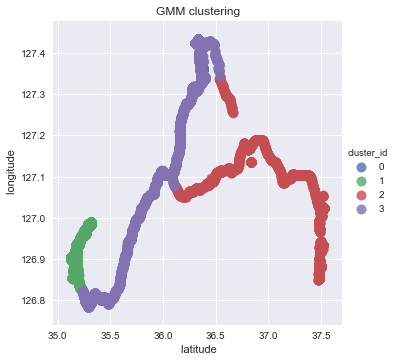

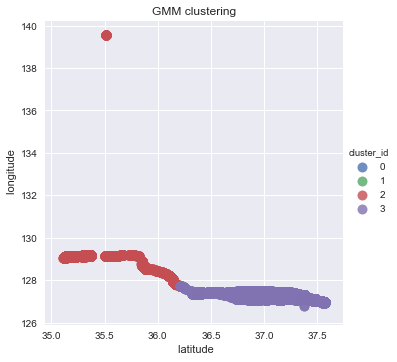

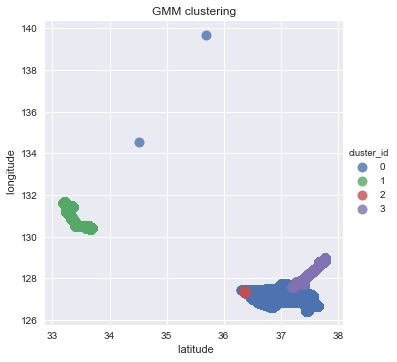

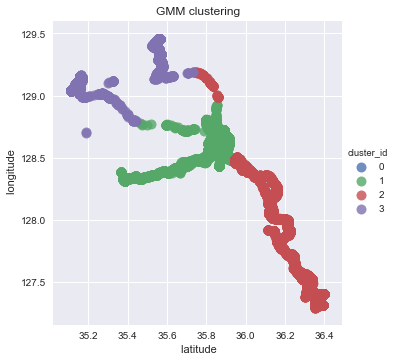

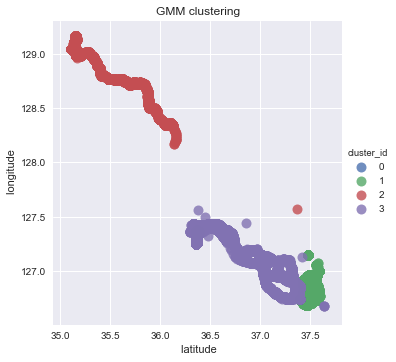

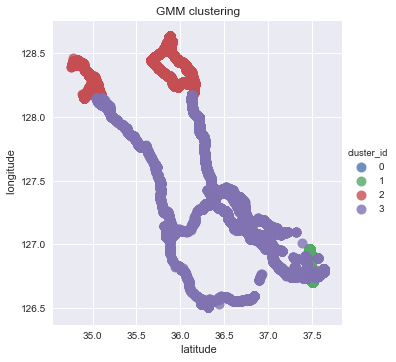

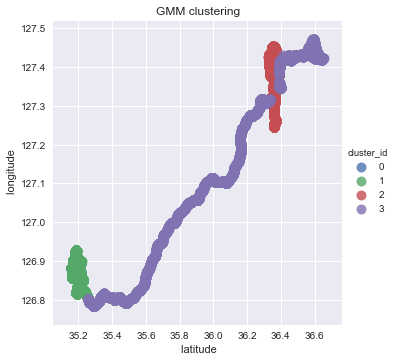

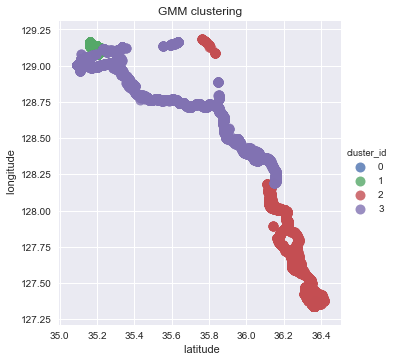

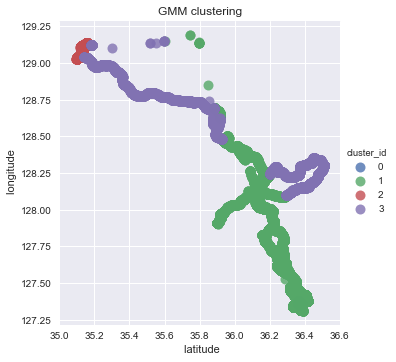

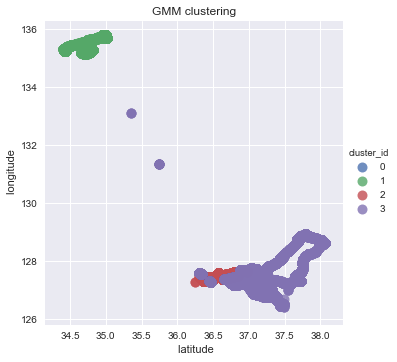

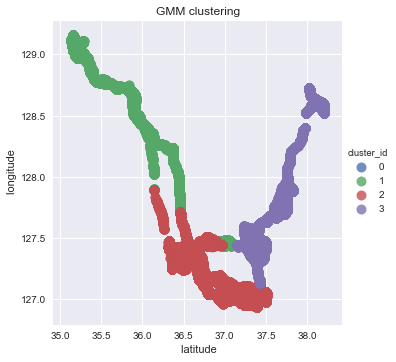

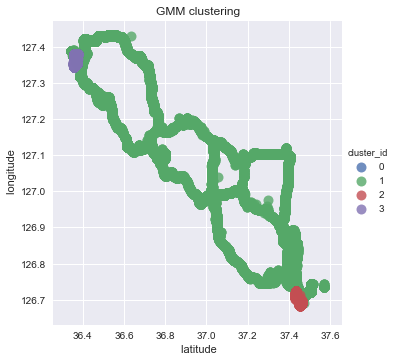

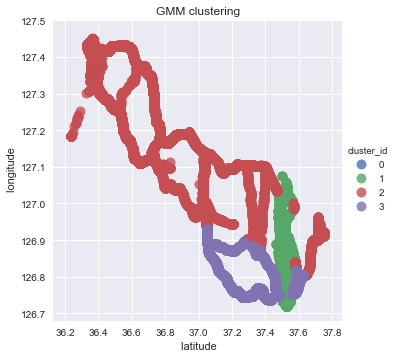

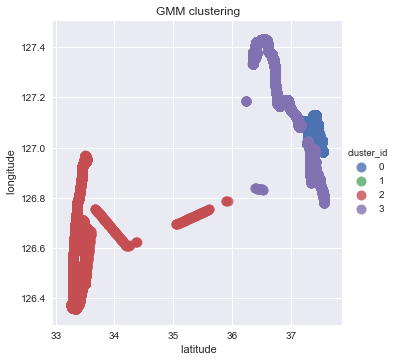

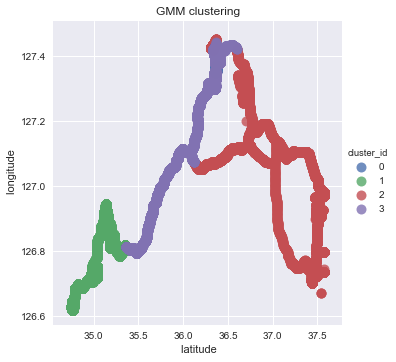

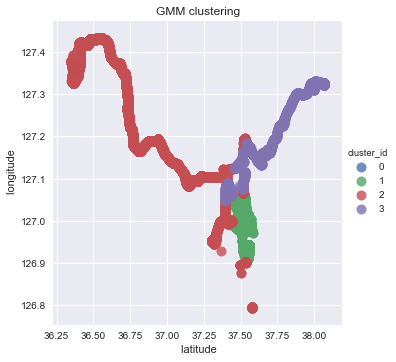

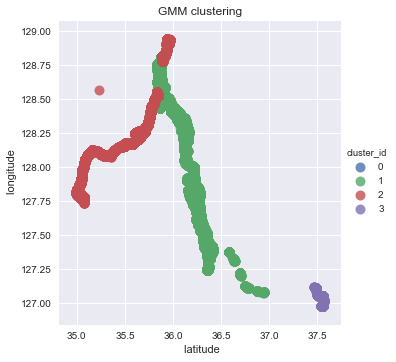

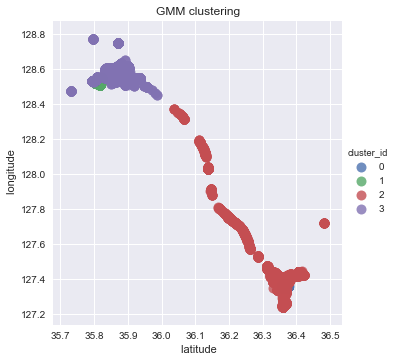

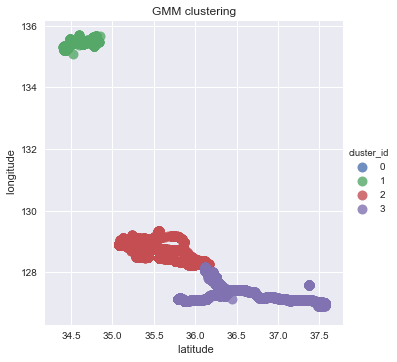

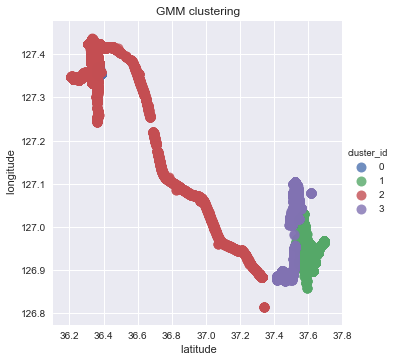

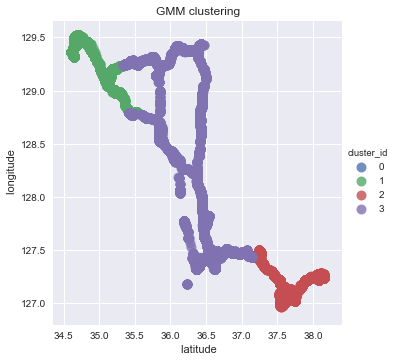

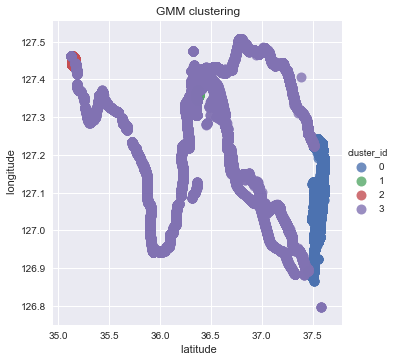

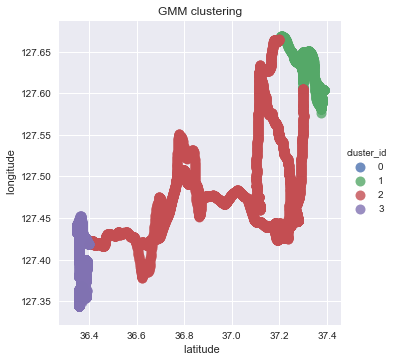

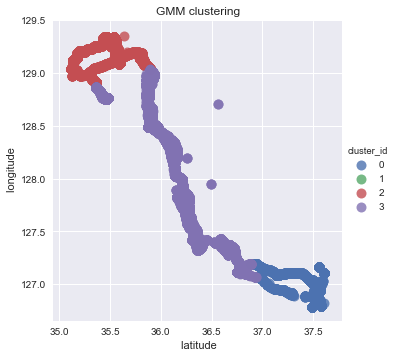

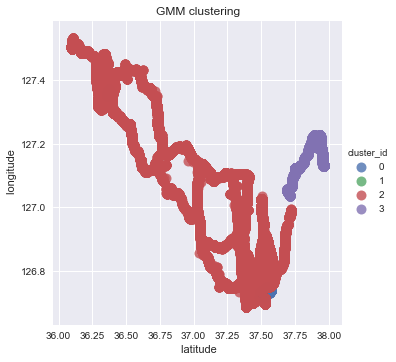

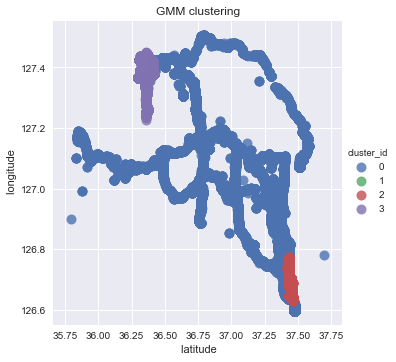

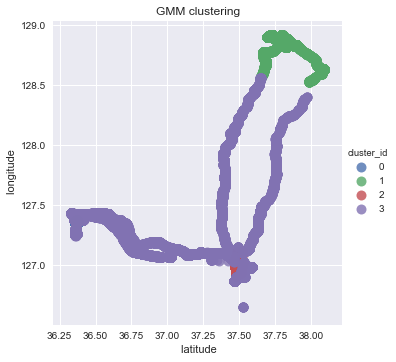

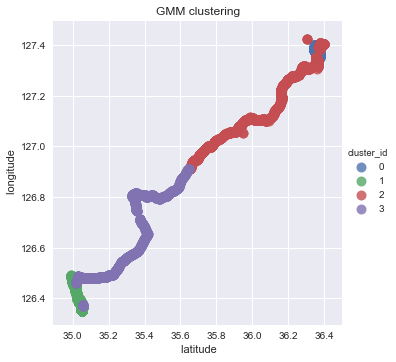

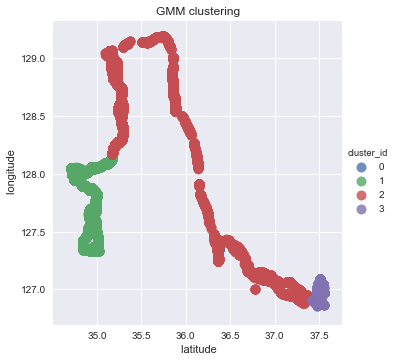

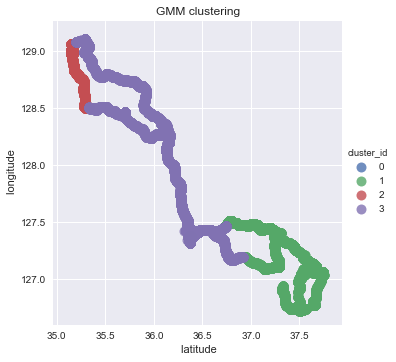

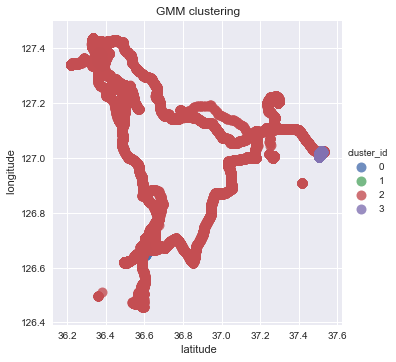

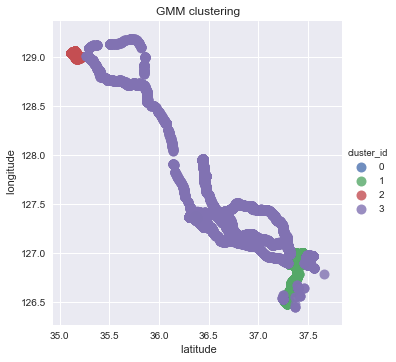

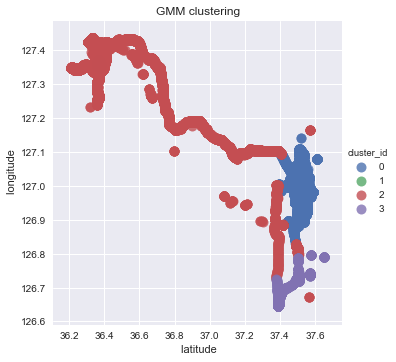

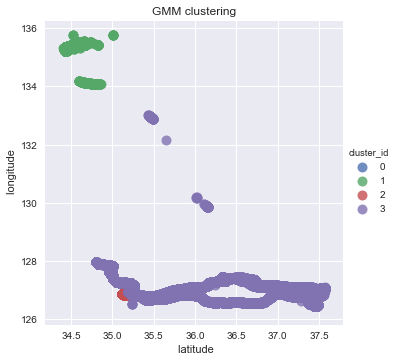

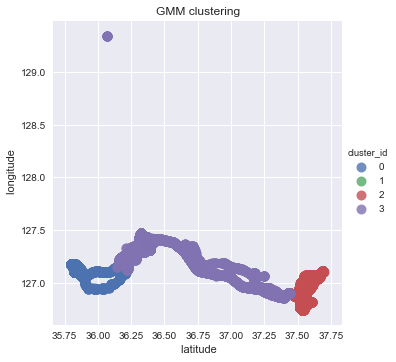

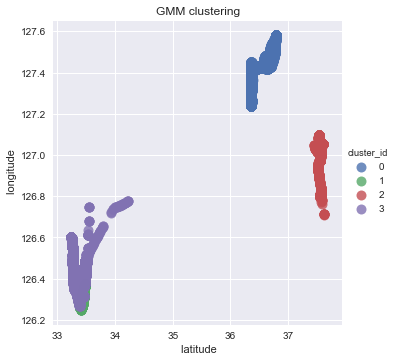

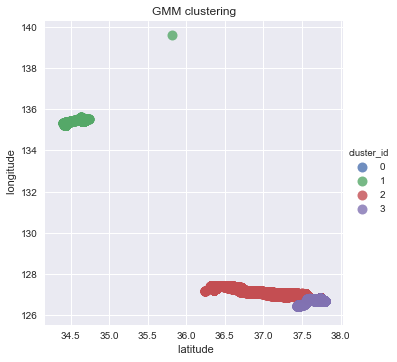

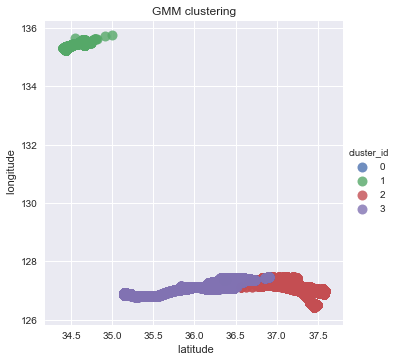

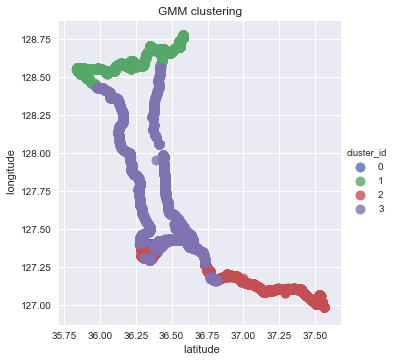

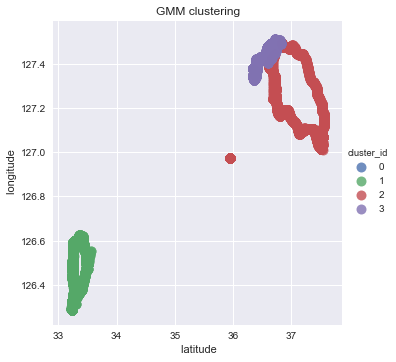

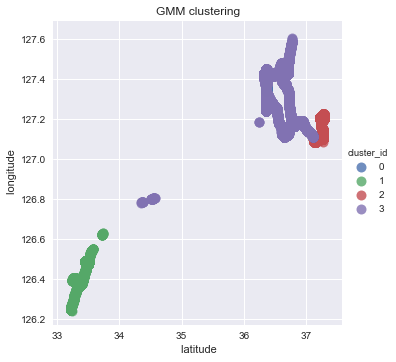

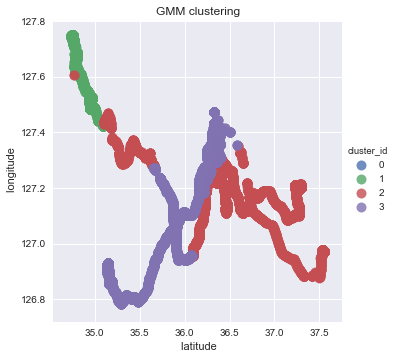

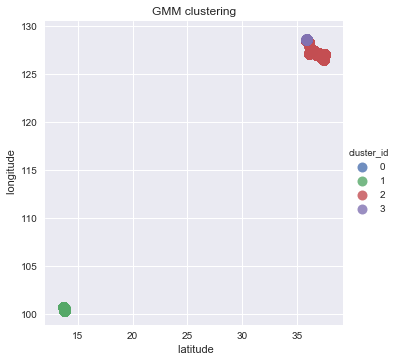

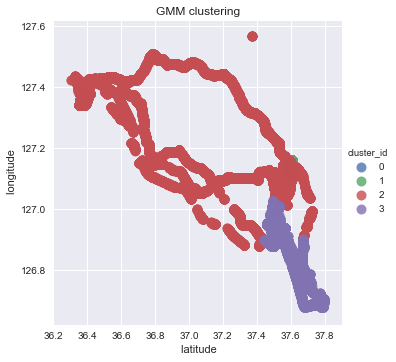

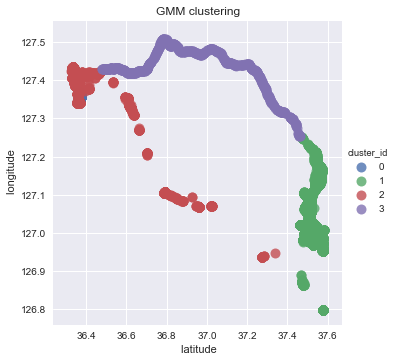

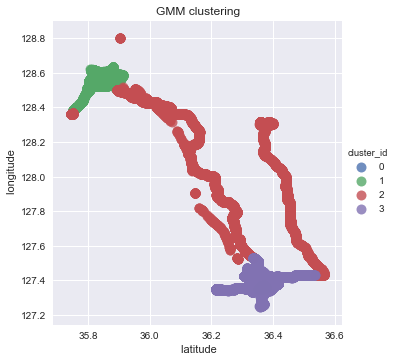

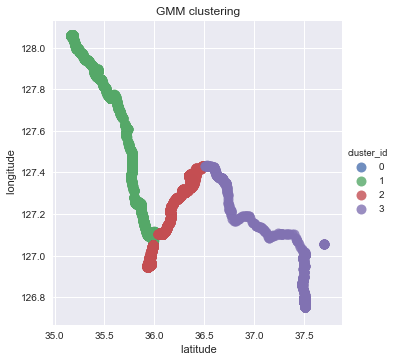

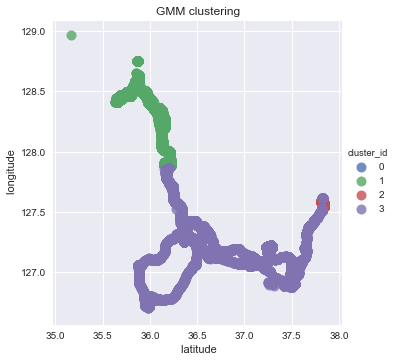

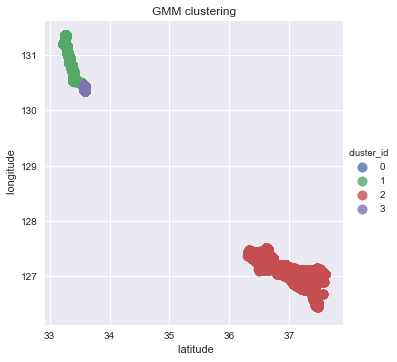

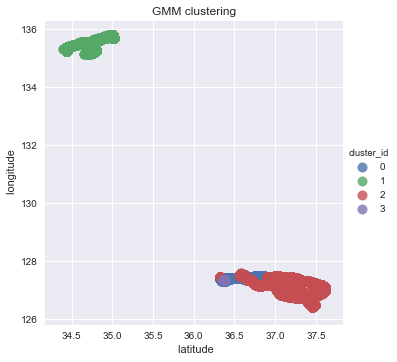

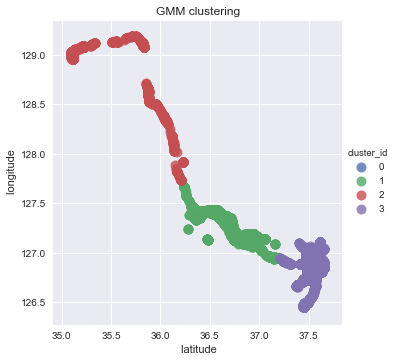

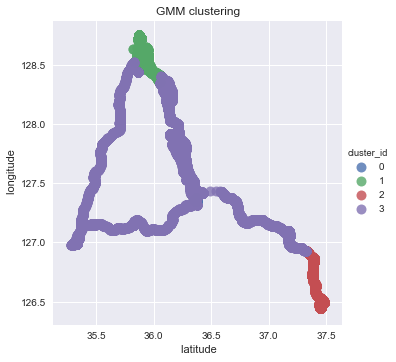

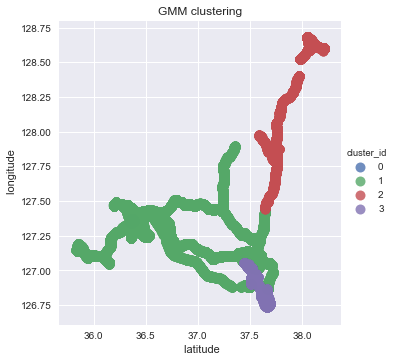

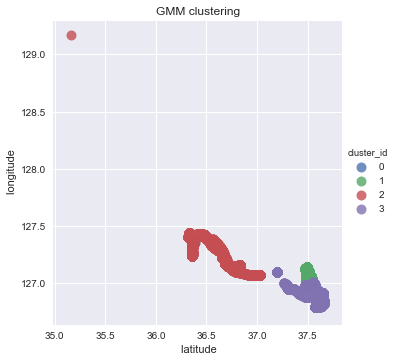

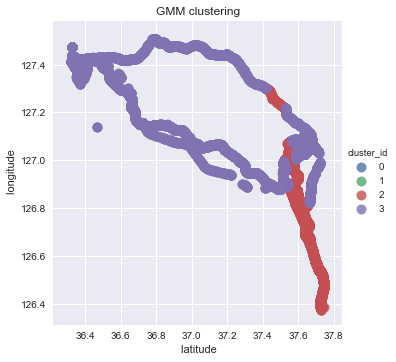

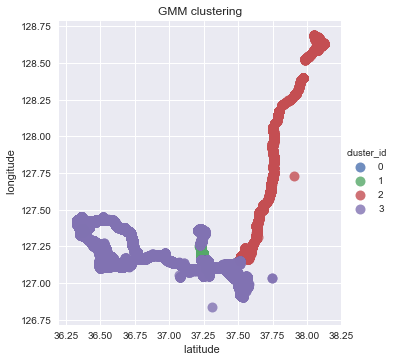

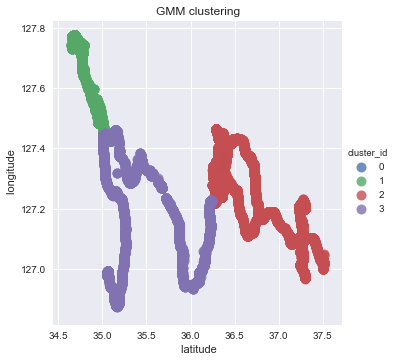

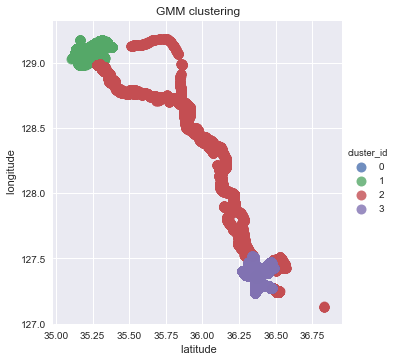

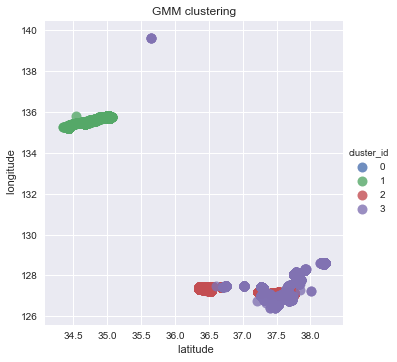

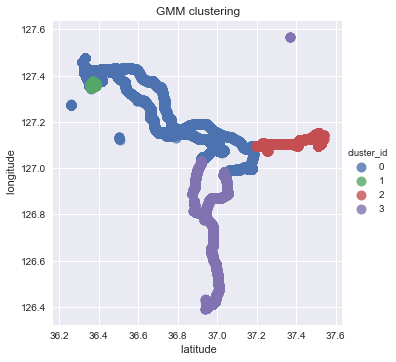

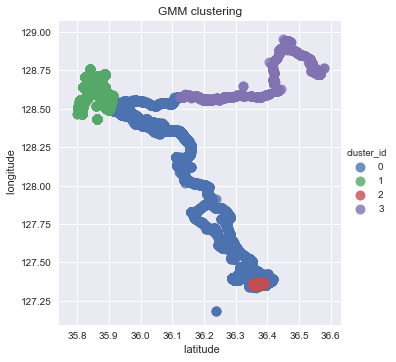

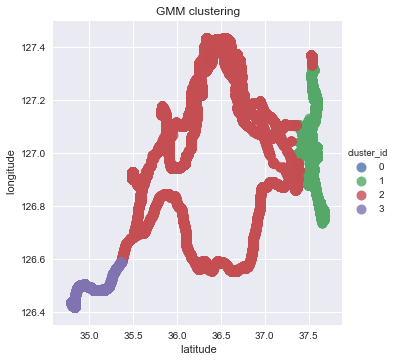

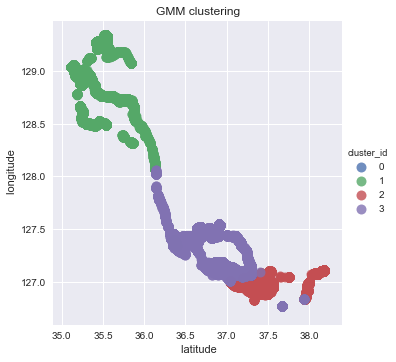

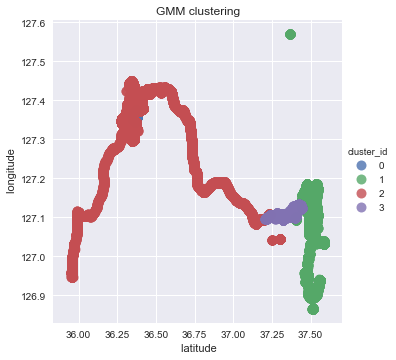

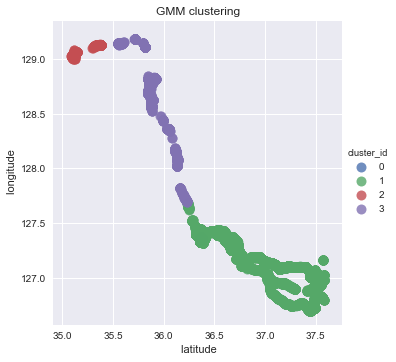

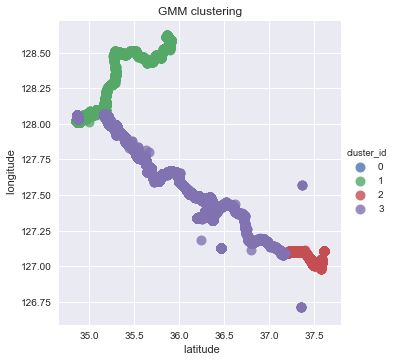

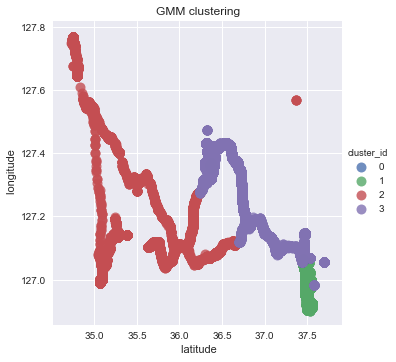

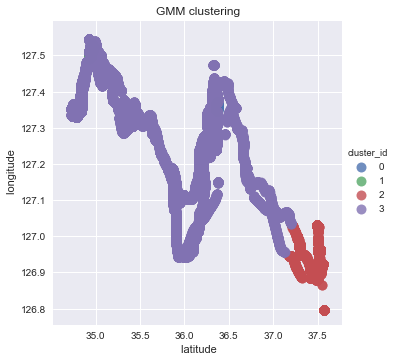

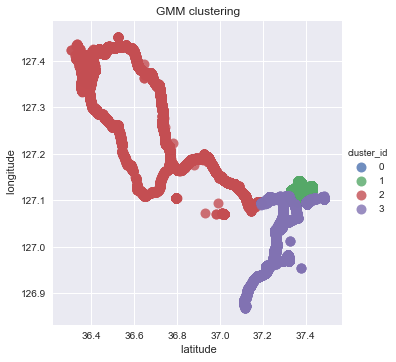

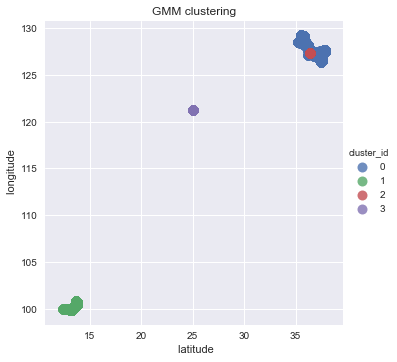

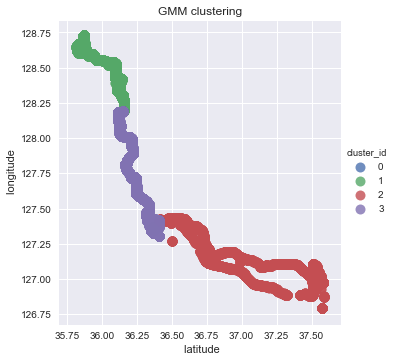

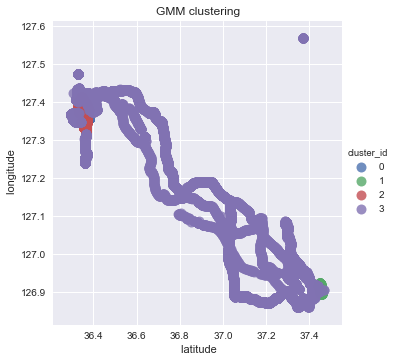

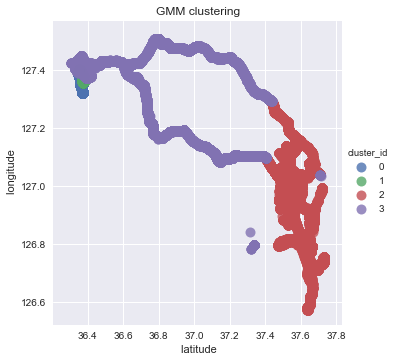

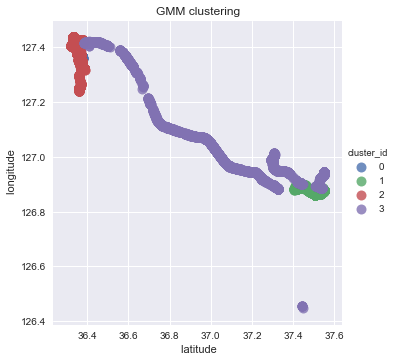

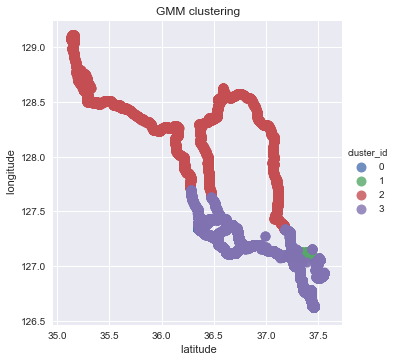

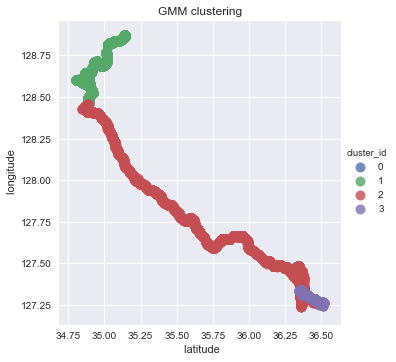

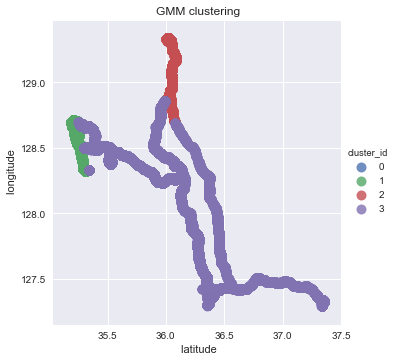

In [37]:
for user in uids:
    loc_df = pd.read_csv("../../"+user+"/GPS_"+user+".csv")
    print(loc_df.shape)
    #GMM 의 input으로 사용하기 위해 데이터 변형
    loc_arr = loc_df[['timestamp', ' latitude',' longitude']]
    data_point = loc_arr[[' latitude',' longitude']].values
    
    gmm = GaussianMixture(n_components=4).fit(data_point)
    loc_labels = gmm.predict(data_point)
    loc_arr['cluster_id'] = loc_labels
    
    loc_arr.to_csv("../../"+user+"/GMM_"+user+".csv")
    
    sns.lmplot(' latitude', ' longitude', data = loc_arr, fit_reg = False, scatter_kws={'s':100}, hue='cluster_id')
    plt.title('GMM clustering')

#### 초단위 Mapping

In [35]:
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
import math
import dateutil
from datetime import date, datetime, time, timedelta

In [36]:
gmm_labeled = pd.read_csv("../../20946596/GMM_20946596.csv")
#2017.09.05_17.36.27
#yyyy.mm.dd_HH.MM.SS. 
gmm_labeled['timestamp'] = gmm_labeled['timestamp'].astype(str)
gmm_labeled['timestamp'] = gmm_labeled['timestamp'].str.replace(" ", "")
gmm_labeled['timestamp'] = gmm_labeled['timestamp'].str.replace(".", "")
gmm_labeled['timestamp'] = gmm_labeled['timestamp'].str.replace("_", "")
gmm_labeled['timestamp'] = pd.to_datetime(gmm_labeled['timestamp'] , format="%Y%m%d%H%M%S")

gmm_labeled.sort_values(by=['timestamp'], inplace=True, ascending = True)
gmm_labeled['time_next'] = gmm_labeled['timestamp'].shift(-1)

In [37]:
gmm_labeled.head()

,Unnamed: 0,timestamp,latitude,longitude,cluster_id,time_next
0,0,2017-09-05 17:36:27,36.367136,127.364432,0,2017-09-05 17:36:40
1,1,2017-09-05 17:36:40,36.367136,127.364432,0,2017-09-05 17:37:11
2,2,2017-09-05 17:37:11,36.367153,127.364536,0,2017-09-05 17:38:09
3,3,2017-09-05 17:38:09,36.367153,127.364536,0,2017-09-05 17:39:17
4,4,2017-09-05 17:39:17,36.367153,127.364536,0,2017-09-05 17:39:47


In [38]:
gmm_labeled.tail()

,Unnamed: 0,timestamp,latitude,longitude,cluster_id,time_next
220179,220179,2017-12-23 18:14:28,35.269145,128.866549,1,2017-12-23 18:16:28
220180,220180,2017-12-23 18:16:28,35.269145,128.866549,1,2017-12-23 18:18:28
220181,220181,2017-12-23 18:18:28,35.269145,128.866549,1,2017-12-23 18:20:25
220182,220182,2017-12-23 18:20:25,35.268824,128.865411,1,2017-12-23 18:22:31
220183,220183,2017-12-23 18:22:31,35.268789,128.865426,1,NaT


In [63]:
import numpy as np    
nat = np.datetime64('NaT')

def nat_check(nat):
    return nat == np.datetime64('NaT')    

In [103]:
from collections import Counter
from operator import itemgetter

def most_common(lst):
    return max(set(lst), key=lst.count)

def mapping_time_loc(df):
        gmm_parse = pd.DataFrame()
        
        for index,row in df.iterrows():
            df_stime = row['timestamp']
            df_etime = row['time_next']

            lat = row['latitude']
            long = row['longitude']
            cluster = row['cluster_id']
            
            if nat_check(df_etime) != True:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
            
                while df_stime < df_etime:
                    df_stime = df_stime + timedelta(seconds=1)
                    
                    gmm_parse.loc[(df_stime), ("latitude")] =  lat
                    gmm_parse.loc[(df_stime), ("longitude")] =  long
                    gmm_parse.loc[(df_stime), ("timestamp")] =  df_stime
                    gmm_parse.loc[(df_stime), ("cluster_id")] =  cluster
                
        return gmm_parse

In [89]:
import timeit


In [104]:
gmm_labeled = pd.read_csv("../../"+user+"/GMM_"+user+".csv")
gmm_labeled.head()
print(gmm_labeled.columns)

Index(['Unnamed: 0', 'timestamp', ' latitude', ' longitude', 'cluster_id'], dtype='object')


In [ ]:
for user in uids:
    print(user)
    start = timeit.default_timer()

    gmm_labeled = pd.read_csv("../../"+user+"/GMM_"+user+".csv")
    
    #gmm_labeled = gmm_labeled.head(2000)
    gmm_labeled['timestamp'] = gmm_labeled['timestamp'].astype(str)
    gmm_labeled['timestamp'] = gmm_labeled['timestamp'].str.replace(" ", "")
    gmm_labeled['timestamp'] = gmm_labeled['timestamp'].str.replace(".", "")
    gmm_labeled['timestamp'] = gmm_labeled['timestamp'].str.replace("_", "")
    gmm_labeled['timestamp'] = pd.to_datetime(gmm_labeled['timestamp'] , format="%Y%m%d%H%M%S")
    
    gmm_labeled.sort_values(by=['timestamp'], inplace=True, ascending = True)
    gmm_labeled['time_next'] = gmm_labeled['timestamp'].shift(-1)
    
    a=[]
    gmm_min=pd.DataFrame()

    for index,row in gmm_labeled.iterrows():
        print("***",index ,"***")
        if row['timestamp'] != row['time_next']:
            
            gmm_min.loc[(row['timestamp']), ('timestamp')]=row['timestamp']
            gmm_min.loc[(row['timestamp']), ('latitude')]=row[' latitude']
            gmm_min.loc[(row['timestamp']), ('longitude')]=row[' longitude']
            gmm_min.loc[(row['timestamp']), ('cluster_id')]=row['cluster_id']

        else:
            a.append(str(row[' latitude'])+" "+str(row[' longitude'])+" "+str(row['cluster_id']))
            infer = most_common(a)
            print(infer)
            a.clear()
            
            
            infer_split = infer.split(" ")
            
            gmm_min.loc[(row['timestamp']), ('timestamp')]=row['timestamp']
            gmm_min.loc[(row['timestamp']), ('latitude')]=infer_split[0]
            gmm_min.loc[(row['timestamp']), ('longitude')]= infer_split[1]
            gmm_min.loc[(row['timestamp']), ('cluster_id')]=infer_split[2]

    gmm_min=gmm_min.reset_index(drop=True)

    gmm_min['time_next'] = gmm_min['timestamp'].shift(-1)
    gmm_min = gmm_min.iloc[:-1]
    
    
    
    stop = timeit.default_timer()

    print(stop - start)
    print("*****")
    
    mapping_start = timeit.default_timer()
    
    gmm_mapped = mapping_time_loc(gmm_min)
    gmm_mapped.to_csv("../../"+user+"/GMM_Time_"+user+".csv")
    
    mapping_stop = timeit.default_timer()

    print(mapping_stop - mapping_start)
    print("*****")
    
    break

20946596
*** 0 ***
*** 1 ***
*** 2 ***
*** 3 ***
*** 4 ***
*** 5 ***
*** 6 ***
*** 7 ***
*** 8 ***
*** 9 ***
*** 10 ***
*** 11 ***
*** 12 ***
*** 13 ***
*** 14 ***
*** 15 ***
*** 16 ***
*** 17 ***
*** 18 ***
*** 19 ***
*** 20 ***
*** 21 ***
*** 22 ***
*** 23 ***
*** 24 ***
*** 25 ***
*** 26 ***
*** 27 ***
*** 28 ***
*** 29 ***
*** 30 ***
*** 31 ***
*** 32 ***
*** 33 ***
*** 34 ***
*** 35 ***
*** 36 ***
*** 37 ***
*** 38 ***
*** 39 ***
36.3678566 127.3639678 0
*** 40 ***
*** 41 ***
*** 42 ***
*** 43 ***
*** 44 ***
*** 45 ***
*** 46 ***
*** 47 ***
*** 48 ***
*** 49 ***
*** 50 ***
*** 51 ***
*** 52 ***
*** 53 ***
*** 54 ***
*** 55 ***
*** 56 ***
*** 57 ***
*** 58 ***
*** 59 ***
*** 60 ***
*** 61 ***
*** 62 ***
*** 63 ***
*** 64 ***
*** 65 ***
*** 66 ***
*** 67 ***
*** 68 ***
*** 69 ***
*** 70 ***
*** 71 ***
*** 72 ***
*** 73 ***
*** 74 ***
*** 75 ***
*** 76 ***
*** 77 ***
*** 78 ***
*** 79 ***
*** 80 ***
*** 81 ***
*** 82 ***
*** 83 ***
*** 84 ***
*** 85 ***
*** 86 ***
*** 87 ***
*** 88 *

*** 885 ***
*** 886 ***
*** 887 ***
*** 888 ***
*** 889 ***
*** 890 ***
*** 891 ***
*** 892 ***
*** 893 ***
*** 894 ***
*** 895 ***
*** 896 ***
*** 897 ***
*** 898 ***
*** 899 ***
*** 900 ***
*** 901 ***
*** 902 ***
*** 903 ***
*** 904 ***
*** 905 ***
*** 906 ***
*** 907 ***
*** 908 ***
*** 909 ***
*** 910 ***
*** 911 ***
*** 912 ***
*** 913 ***
*** 914 ***
*** 915 ***
*** 916 ***
*** 917 ***
*** 918 ***
*** 919 ***
*** 920 ***
*** 921 ***
*** 922 ***
*** 923 ***
*** 924 ***
*** 925 ***
*** 926 ***
*** 927 ***
*** 928 ***
*** 929 ***
*** 930 ***
*** 931 ***
*** 932 ***
36.3729735 127.3606107 0
*** 933 ***
*** 934 ***
*** 935 ***
*** 936 ***
*** 937 ***
36.3731575 127.3605288 0
*** 938 ***
*** 939 ***
*** 940 ***
*** 941 ***
*** 942 ***
*** 943 ***
*** 944 ***
*** 945 ***
*** 946 ***
*** 947 ***
*** 948 ***
*** 949 ***
*** 950 ***
*** 951 ***
*** 952 ***
*** 953 ***
*** 954 ***
*** 955 ***
*** 956 ***
*** 957 ***
*** 958 ***
*** 959 ***
*** 960 ***
*** 961 ***
*** 962 ***
*** 963 ***
**

*** 1621 ***
*** 1622 ***
*** 1623 ***
*** 1624 ***
*** 1625 ***
*** 1626 ***
*** 1627 ***
*** 1628 ***
*** 1629 ***
*** 1630 ***
*** 1631 ***
*** 1632 ***
*** 1633 ***
*** 1634 ***
*** 1635 ***
*** 1636 ***
*** 1637 ***
*** 1638 ***
*** 1639 ***
*** 1640 ***
*** 1641 ***
*** 1642 ***
*** 1643 ***
*** 1644 ***
*** 1645 ***
*** 1646 ***
*** 1647 ***
*** 1648 ***
*** 1649 ***
*** 1650 ***
*** 1651 ***
*** 1652 ***
*** 1653 ***
*** 1654 ***
*** 1655 ***
*** 1656 ***
*** 1657 ***
*** 1658 ***
*** 1659 ***
*** 1660 ***
*** 1661 ***
*** 1662 ***
*** 1663 ***
*** 1664 ***
*** 1665 ***
*** 1666 ***
*** 1667 ***
*** 1668 ***
*** 1669 ***
*** 1670 ***
*** 1671 ***
*** 1672 ***
*** 1673 ***
*** 1674 ***
*** 1675 ***
*** 1676 ***
*** 1677 ***
*** 1678 ***
*** 1679 ***
*** 1680 ***
*** 1681 ***
*** 1682 ***
*** 1683 ***
*** 1684 ***
*** 1685 ***
*** 1686 ***
*** 1687 ***
*** 1688 ***
*** 1689 ***
*** 1690 ***
*** 1691 ***
*** 1692 ***
*** 1693 ***
*** 1694 ***
*** 1695 ***
*** 1696 ***
*** 1697 ***

*** 2468 ***
*** 2469 ***
*** 2470 ***
*** 2471 ***
*** 2472 ***
*** 2473 ***
*** 2474 ***
*** 2475 ***
*** 2476 ***
*** 2477 ***
*** 2478 ***
*** 2479 ***
*** 2480 ***
*** 2481 ***
*** 2482 ***
*** 2483 ***
*** 2484 ***
*** 2485 ***
*** 2486 ***
*** 2487 ***
*** 2488 ***
*** 2489 ***
*** 2490 ***
*** 2491 ***
*** 2492 ***
*** 2493 ***
*** 2494 ***
*** 2495 ***
*** 2496 ***
*** 2497 ***
*** 2498 ***
*** 2499 ***
*** 2500 ***
*** 2501 ***
*** 2502 ***
*** 2503 ***
*** 2504 ***
*** 2505 ***
*** 2506 ***
*** 2507 ***
*** 2508 ***
*** 2509 ***
*** 2510 ***
*** 2511 ***
*** 2512 ***
*** 2513 ***
*** 2514 ***
*** 2515 ***
*** 2516 ***
*** 2517 ***
*** 2518 ***
*** 2519 ***
*** 2520 ***
*** 2521 ***
*** 2522 ***
*** 2523 ***
*** 2524 ***
*** 2525 ***
*** 2526 ***
*** 2527 ***
*** 2528 ***
*** 2529 ***
*** 2530 ***
*** 2531 ***
*** 2532 ***
*** 2533 ***
*** 2534 ***
*** 2535 ***
*** 2536 ***
*** 2537 ***
*** 2538 ***
*** 2539 ***
*** 2540 ***
*** 2541 ***
*** 2542 ***
*** 2543 ***
*** 2544 ***

*** 3139 ***
*** 3140 ***
*** 3141 ***
*** 3142 ***
*** 3143 ***
*** 3144 ***
*** 3145 ***
*** 3146 ***
*** 3147 ***
*** 3148 ***
*** 3149 ***
*** 3150 ***
*** 3151 ***
*** 3152 ***
*** 3153 ***
*** 3154 ***
*** 3155 ***
*** 3156 ***
*** 3157 ***
*** 3158 ***
*** 3159 ***
*** 3160 ***
*** 3161 ***
*** 3162 ***
*** 3163 ***
*** 3164 ***
*** 3165 ***
*** 3166 ***
*** 3167 ***
*** 3168 ***
*** 3169 ***
*** 3170 ***
*** 3171 ***
*** 3172 ***
*** 3173 ***
*** 3174 ***
*** 3175 ***
*** 3176 ***
*** 3177 ***
*** 3178 ***
36.3730176 127.3603619 0
*** 3179 ***
*** 3180 ***
*** 3181 ***
*** 3182 ***
*** 3183 ***
*** 3184 ***
*** 3185 ***
*** 3186 ***
*** 3187 ***
*** 3188 ***
*** 3189 ***
*** 3190 ***
*** 3191 ***
*** 3192 ***
*** 3193 ***
*** 3194 ***
*** 3195 ***
*** 3196 ***
*** 3197 ***
*** 3198 ***
*** 3199 ***
*** 3200 ***
*** 3201 ***
*** 3202 ***
*** 3203 ***
*** 3204 ***
*** 3205 ***
*** 3206 ***
*** 3207 ***
*** 3208 ***
*** 3209 ***
*** 3210 ***
*** 3211 ***
*** 3212 ***
*** 3213 ***


*** 4389 ***
*** 4390 ***
*** 4391 ***
*** 4392 ***
*** 4393 ***
*** 4394 ***
*** 4395 ***
*** 4396 ***
*** 4397 ***
*** 4398 ***
*** 4399 ***
*** 4400 ***
*** 4401 ***
*** 4402 ***
*** 4403 ***
*** 4404 ***
*** 4405 ***
*** 4406 ***
*** 4407 ***
*** 4408 ***
*** 4409 ***
*** 4410 ***
*** 4411 ***
*** 4412 ***
*** 4413 ***
*** 4414 ***
*** 4415 ***
*** 4416 ***
*** 4417 ***
*** 4418 ***
*** 4419 ***
*** 4420 ***
*** 4421 ***
*** 4422 ***
*** 4423 ***
*** 4424 ***
*** 4425 ***
*** 4426 ***
*** 4427 ***
*** 4428 ***
*** 4429 ***
*** 4430 ***
*** 4431 ***
*** 4432 ***
*** 4433 ***
*** 4434 ***
*** 4435 ***
*** 4436 ***
*** 4437 ***
*** 4438 ***
*** 4439 ***
*** 4440 ***
*** 4441 ***
*** 4442 ***
*** 4443 ***
*** 4444 ***
*** 4445 ***
*** 4446 ***
*** 4447 ***
*** 4448 ***
*** 4449 ***
*** 4450 ***
*** 4451 ***
*** 4452 ***
*** 4453 ***
*** 4454 ***
*** 4455 ***
*** 4456 ***
*** 4457 ***
*** 4458 ***
*** 4459 ***
*** 4460 ***
*** 4461 ***
*** 4462 ***
*** 4463 ***
*** 4464 ***
*** 4465 ***

*** 5020 ***
*** 5021 ***
*** 5022 ***
*** 5023 ***
*** 5024 ***
*** 5025 ***
*** 5026 ***
*** 5027 ***
*** 5028 ***
*** 5029 ***
*** 5030 ***
*** 5031 ***
*** 5032 ***
*** 5033 ***
*** 5034 ***
*** 5035 ***
*** 5036 ***
*** 5037 ***
*** 5038 ***
*** 5039 ***
*** 5040 ***
*** 5041 ***
*** 5042 ***
*** 5043 ***
*** 5044 ***
*** 5045 ***
*** 5046 ***
*** 5047 ***
*** 5048 ***
*** 5049 ***
*** 5050 ***
*** 5051 ***
*** 5052 ***
*** 5053 ***
*** 5054 ***
*** 5055 ***
*** 5056 ***
*** 5057 ***
*** 5058 ***
*** 5059 ***
*** 5060 ***
*** 5061 ***
*** 5062 ***
*** 5063 ***
*** 5064 ***
*** 5065 ***
*** 5066 ***
*** 5067 ***
*** 5068 ***
*** 5069 ***
*** 5070 ***
*** 5071 ***
*** 5072 ***
*** 5073 ***
*** 5074 ***
*** 5075 ***
*** 5076 ***
*** 5077 ***
*** 5078 ***
*** 5079 ***
*** 5080 ***
*** 5081 ***
*** 5082 ***
*** 5083 ***
*** 5084 ***
*** 5085 ***
*** 5086 ***
*** 5087 ***
*** 5088 ***
*** 5089 ***
*** 5090 ***
*** 5091 ***
*** 5092 ***
*** 5093 ***
*** 5094 ***
*** 5095 ***
*** 5096 ***

*** 5658 ***
*** 5659 ***
*** 5660 ***
*** 5661 ***
*** 5662 ***
*** 5663 ***
*** 5664 ***
*** 5665 ***
*** 5666 ***
*** 5667 ***
*** 5668 ***
*** 5669 ***
*** 5670 ***
*** 5671 ***
*** 5672 ***
*** 5673 ***
*** 5674 ***
*** 5675 ***
*** 5676 ***
*** 5677 ***
*** 5678 ***
*** 5679 ***
*** 5680 ***
*** 5681 ***
*** 5682 ***
*** 5683 ***
*** 5684 ***
*** 5685 ***
*** 5686 ***
*** 5687 ***
*** 5688 ***
*** 5689 ***
*** 5690 ***
*** 5691 ***
*** 5692 ***
*** 5693 ***
*** 5694 ***
*** 5695 ***
*** 5696 ***
*** 5697 ***
*** 5698 ***
*** 5699 ***
*** 5700 ***
*** 5701 ***
*** 5702 ***
*** 5703 ***
*** 5704 ***
*** 5705 ***
*** 5706 ***
*** 5707 ***
*** 5708 ***
*** 5709 ***
*** 5710 ***
*** 5711 ***
*** 5712 ***
*** 5713 ***
*** 5714 ***
*** 5715 ***
*** 5716 ***
*** 5717 ***
*** 5718 ***
*** 5719 ***
*** 5720 ***
*** 5721 ***
*** 5722 ***
*** 5723 ***
*** 5724 ***
*** 5725 ***
*** 5726 ***
*** 5727 ***
*** 5728 ***
*** 5729 ***
*** 5730 ***
*** 5731 ***
*** 5732 ***
*** 5733 ***
*** 5734 ***

*** 6317 ***
*** 6318 ***
*** 6319 ***
*** 6320 ***
*** 6321 ***
*** 6322 ***
*** 6323 ***
*** 6324 ***
*** 6325 ***
*** 6326 ***
*** 6327 ***
*** 6328 ***
*** 6329 ***
*** 6330 ***
*** 6331 ***
*** 6332 ***
*** 6333 ***
*** 6334 ***
*** 6335 ***
*** 6336 ***
*** 6337 ***
*** 6338 ***
*** 6339 ***
*** 6340 ***
*** 6341 ***
*** 6342 ***
*** 6343 ***
*** 6344 ***
*** 6345 ***
*** 6346 ***
*** 6347 ***
*** 6348 ***
*** 6349 ***
*** 6350 ***
*** 6351 ***
*** 6352 ***
*** 6353 ***
*** 6354 ***
*** 6355 ***
*** 6356 ***
*** 6357 ***
*** 6358 ***
*** 6359 ***
*** 6360 ***
*** 6361 ***
*** 6362 ***
*** 6363 ***
*** 6364 ***
*** 6365 ***
*** 6366 ***
36.3702449 127.3625117 0
*** 6367 ***
*** 6368 ***
*** 6369 ***
*** 6370 ***
*** 6371 ***
*** 6372 ***
*** 6373 ***
*** 6374 ***
*** 6375 ***
*** 6376 ***
*** 6377 ***
36.3703833 127.3625326 0
*** 6378 ***
*** 6379 ***
*** 6380 ***
*** 6381 ***
*** 6382 ***
*** 6383 ***
*** 6384 ***
*** 6385 ***
*** 6386 ***
*** 6387 ***
*** 6388 ***
*** 6389 ***
*

*** 6947 ***
*** 6948 ***
*** 6949 ***
*** 6950 ***
*** 6951 ***
*** 6952 ***
*** 6953 ***
*** 6954 ***
*** 6955 ***
*** 6956 ***
*** 6957 ***
*** 6958 ***
*** 6959 ***
*** 6960 ***
*** 6961 ***
*** 6962 ***
*** 6963 ***
*** 6964 ***
*** 6965 ***
*** 6966 ***
*** 6967 ***
*** 6968 ***
*** 6969 ***
*** 6970 ***
*** 6971 ***
*** 6972 ***
*** 6973 ***
*** 6974 ***
*** 6975 ***
*** 6976 ***
*** 6977 ***
*** 6978 ***
*** 6979 ***
*** 6980 ***
*** 6981 ***
*** 6982 ***
*** 6983 ***
*** 6984 ***
*** 6985 ***
*** 6986 ***
*** 6987 ***
*** 6988 ***
*** 6989 ***
*** 6990 ***
*** 6991 ***
*** 6992 ***
*** 6993 ***
*** 6994 ***
*** 6995 ***
*** 6996 ***
*** 6997 ***
*** 6998 ***
*** 6999 ***
*** 7000 ***
*** 7001 ***
*** 7002 ***
*** 7003 ***
*** 7004 ***
*** 7005 ***
*** 7006 ***
*** 7007 ***
*** 7008 ***
*** 7009 ***
*** 7010 ***
*** 7011 ***
*** 7012 ***
*** 7013 ***
*** 7014 ***
*** 7015 ***
*** 7016 ***
*** 7017 ***
*** 7018 ***
*** 7019 ***
*** 7020 ***
*** 7021 ***
*** 7022 ***
*** 7023 ***

*** 7585 ***
*** 7586 ***
*** 7587 ***
*** 7588 ***
*** 7589 ***
*** 7590 ***
*** 7591 ***
*** 7592 ***
*** 7593 ***
*** 7594 ***
*** 7595 ***
*** 7596 ***
*** 7597 ***
*** 7598 ***
*** 7599 ***
*** 7600 ***
*** 7601 ***
*** 7602 ***
*** 7603 ***
*** 7604 ***
*** 7605 ***
*** 7606 ***
*** 7607 ***
*** 7608 ***
*** 7609 ***
*** 7610 ***
*** 7611 ***
*** 7612 ***
*** 7613 ***
*** 7614 ***
*** 7615 ***
*** 7616 ***
*** 7617 ***
*** 7618 ***
*** 7619 ***
*** 7620 ***
*** 7621 ***
*** 7622 ***
*** 7623 ***
36.3640236 127.3591111 3
*** 7624 ***
*** 7625 ***
*** 7626 ***
*** 7627 ***
*** 7628 ***
*** 7629 ***
*** 7630 ***
*** 7631 ***
*** 7632 ***
*** 7633 ***
*** 7634 ***
*** 7635 ***
*** 7636 ***
*** 7637 ***
*** 7638 ***
*** 7639 ***
*** 7640 ***
*** 7641 ***
*** 7642 ***
*** 7643 ***
*** 7644 ***
*** 7645 ***
*** 7646 ***
*** 7647 ***
*** 7648 ***
*** 7649 ***
*** 7650 ***
*** 7651 ***
*** 7652 ***
*** 7653 ***
*** 7654 ***
*** 7655 ***
*** 7656 ***
*** 7657 ***
*** 7658 ***
*** 7659 ***


*** 8222 ***
*** 8223 ***
*** 8224 ***
*** 8225 ***
*** 8226 ***
*** 8227 ***
*** 8228 ***
*** 8229 ***
*** 8230 ***
*** 8231 ***
*** 8232 ***
*** 8233 ***
*** 8234 ***
*** 8235 ***
*** 8236 ***
*** 8237 ***
*** 8238 ***
*** 8239 ***
*** 8240 ***
*** 8241 ***
*** 8242 ***
*** 8243 ***
*** 8244 ***
*** 8245 ***
*** 8246 ***
*** 8247 ***
*** 8248 ***
*** 8249 ***
*** 8250 ***
*** 8251 ***
*** 8252 ***
36.37381129999999 127.3581598 0
*** 8253 ***
*** 8254 ***
*** 8255 ***
*** 8256 ***
*** 8257 ***
*** 8258 ***
*** 8259 ***
*** 8260 ***
36.3738424 127.3582179 0
*** 8261 ***
*** 8262 ***
*** 8263 ***
*** 8264 ***
*** 8265 ***
*** 8266 ***
*** 8267 ***
*** 8268 ***
*** 8269 ***
*** 8270 ***
*** 8271 ***
*** 8272 ***
*** 8273 ***
*** 8274 ***
*** 8275 ***
*** 8276 ***
*** 8277 ***
*** 8278 ***
*** 8279 ***
*** 8280 ***
*** 8281 ***
*** 8282 ***
*** 8283 ***
*** 8284 ***
*** 8285 ***
*** 8286 ***
*** 8287 ***
*** 8288 ***
*** 8289 ***
*** 8290 ***
*** 8291 ***
*** 8292 ***
*** 8293 ***
*** 829

*** 8874 ***
*** 8875 ***
*** 8876 ***
*** 8877 ***
*** 8878 ***
*** 8879 ***
*** 8881 ***
36.36694310000001 127.3185944 3
*** 8880 ***
*** 8882 ***
*** 8883 ***
*** 8884 ***
*** 8885 ***
*** 8886 ***
*** 8887 ***
*** 8888 ***
*** 8889 ***
*** 8890 ***
*** 8891 ***
*** 8892 ***
*** 8893 ***
*** 8894 ***
*** 8895 ***
*** 8896 ***
*** 8897 ***
*** 8898 ***
*** 8899 ***
*** 8900 ***
*** 8901 ***
*** 8902 ***
*** 8903 ***
*** 8904 ***
*** 8905 ***
*** 8906 ***
*** 8907 ***
*** 8908 ***
*** 8909 ***
*** 8910 ***
*** 8911 ***
*** 8912 ***
*** 8913 ***
*** 8914 ***
*** 8915 ***
*** 8916 ***
*** 8917 ***
*** 8918 ***
*** 8919 ***
*** 8920 ***
*** 8921 ***
*** 8922 ***
*** 8923 ***
*** 8924 ***
*** 8925 ***
*** 8926 ***
*** 8927 ***
*** 8928 ***
*** 8929 ***
*** 8930 ***
*** 8931 ***
*** 8932 ***
*** 8933 ***
*** 8934 ***
*** 8935 ***
*** 8936 ***
*** 8937 ***
*** 8938 ***
*** 8939 ***
*** 8940 ***
*** 8941 ***
*** 8942 ***
*** 8943 ***
*** 8944 ***
*** 8945 ***
*** 8946 ***
*** 8947 ***
*** 89

*** 9512 ***
*** 9513 ***
*** 9514 ***
*** 9515 ***
*** 9516 ***
*** 9517 ***
*** 9518 ***
*** 9519 ***
*** 9520 ***
*** 9521 ***
*** 9522 ***
*** 9523 ***
*** 9524 ***
*** 9525 ***
*** 9526 ***
*** 9527 ***
*** 9528 ***
*** 9529 ***
*** 9530 ***
*** 9531 ***
*** 9532 ***
*** 9533 ***
*** 9534 ***
*** 9535 ***
*** 9536 ***
*** 9537 ***
*** 9538 ***
*** 9539 ***
*** 9540 ***
*** 9541 ***
*** 9542 ***
36.3554811 127.3359023 3
*** 9543 ***
*** 9544 ***
*** 9545 ***
*** 9546 ***
*** 9547 ***
*** 9548 ***
*** 9549 ***
*** 9550 ***
*** 9551 ***
*** 9552 ***
*** 9553 ***
*** 9554 ***
*** 9555 ***
*** 9556 ***
*** 9557 ***
*** 9558 ***
*** 9559 ***
*** 9560 ***
*** 9561 ***
*** 9562 ***
*** 9563 ***
*** 9564 ***
*** 9565 ***
*** 9566 ***
*** 9567 ***
*** 9568 ***
*** 9569 ***
*** 9570 ***
*** 9571 ***
*** 9572 ***
*** 9573 ***
*** 9574 ***
*** 9575 ***
*** 9576 ***
*** 9577 ***
*** 9578 ***
*** 9579 ***
*** 9580 ***
*** 9581 ***
*** 9582 ***
*** 9583 ***
*** 9584 ***
*** 9585 ***
*** 9586 ***


*** 10140 ***
*** 10141 ***
*** 10142 ***
*** 10143 ***
*** 10144 ***
*** 10145 ***
*** 10146 ***
*** 10147 ***
*** 10148 ***
*** 10149 ***
*** 10150 ***
*** 10151 ***
*** 10152 ***
*** 10153 ***
*** 10154 ***
*** 10155 ***
*** 10156 ***
*** 10157 ***
*** 10158 ***
*** 10159 ***
*** 10160 ***
*** 10161 ***
*** 10162 ***
*** 10163 ***
*** 10164 ***
*** 10165 ***
*** 10166 ***
*** 10167 ***
*** 10168 ***
*** 10169 ***
*** 10170 ***
*** 10171 ***
*** 10172 ***
*** 10173 ***
*** 10174 ***
*** 10175 ***
*** 10176 ***
*** 10177 ***
*** 10178 ***
*** 10179 ***
*** 10180 ***
*** 10181 ***
*** 10182 ***
*** 10183 ***
*** 10184 ***
*** 10185 ***
*** 10186 ***
*** 10187 ***
*** 10188 ***
*** 10189 ***
*** 10190 ***
*** 10191 ***
*** 10192 ***
*** 10193 ***
*** 10194 ***
*** 10195 ***
*** 10196 ***
*** 10197 ***
*** 10198 ***
*** 10199 ***
*** 10200 ***
*** 10201 ***
36.8611216 127.6325079 2
*** 10202 ***
*** 10203 ***
*** 10204 ***
*** 10205 ***
*** 10206 ***
*** 10207 ***
*** 10208 ***
*** 10209

*** 11301 ***
*** 11302 ***
*** 11303 ***
*** 11304 ***
*** 11305 ***
*** 11306 ***
*** 11307 ***
*** 11308 ***
*** 11309 ***
*** 11310 ***
*** 11311 ***
*** 11312 ***
*** 11313 ***
*** 11314 ***
*** 11315 ***
*** 11316 ***
*** 11317 ***
*** 11318 ***
*** 11319 ***
*** 11320 ***
*** 11321 ***
*** 11322 ***
*** 11323 ***
*** 11324 ***
*** 11325 ***
*** 11326 ***
*** 11327 ***
*** 11328 ***
*** 11329 ***
*** 11330 ***
*** 11331 ***
*** 11332 ***
*** 11333 ***
*** 11334 ***
*** 11335 ***
*** 11336 ***
*** 11337 ***
*** 11338 ***
*** 11339 ***
*** 11340 ***
*** 11341 ***
*** 11342 ***
*** 11343 ***
*** 11344 ***
*** 11345 ***
*** 11346 ***
*** 11347 ***
*** 11348 ***
*** 11349 ***
*** 11350 ***
*** 11351 ***
*** 11352 ***
*** 11353 ***
*** 11354 ***
*** 11355 ***
*** 11356 ***
*** 11357 ***
*** 11358 ***
*** 11359 ***
*** 11360 ***
*** 11361 ***
*** 11362 ***
*** 11363 ***
*** 11364 ***
*** 11365 ***
*** 11366 ***
*** 11367 ***
*** 11368 ***
*** 11369 ***
*** 11370 ***
*** 11371 ***
*** 11

*** 11918 ***
*** 11919 ***
*** 11920 ***
*** 11921 ***
*** 11922 ***
*** 11923 ***
*** 11924 ***
*** 11925 ***
*** 11926 ***
*** 11927 ***
*** 11928 ***
*** 11929 ***
*** 11930 ***
*** 11931 ***
*** 11932 ***
*** 11933 ***
*** 11934 ***
*** 11935 ***
*** 11936 ***
*** 11937 ***
*** 11938 ***
*** 11939 ***
*** 11940 ***
*** 11941 ***
*** 11942 ***
*** 11943 ***
*** 11944 ***
*** 11945 ***
*** 11946 ***
*** 11947 ***
*** 11948 ***
*** 11949 ***
*** 11950 ***
*** 11951 ***
*** 11952 ***
*** 11953 ***
*** 11954 ***
*** 11955 ***
*** 11956 ***
*** 11957 ***
*** 11958 ***
*** 11959 ***
*** 11960 ***
*** 11961 ***
*** 11962 ***
*** 11963 ***
*** 11964 ***
*** 11965 ***
*** 11966 ***
*** 11967 ***
*** 11968 ***
*** 11969 ***
*** 11970 ***
*** 11971 ***
*** 11972 ***
*** 11973 ***
*** 11974 ***
*** 11975 ***
*** 11976 ***
*** 11977 ***
*** 11978 ***
*** 11979 ***
*** 11980 ***
*** 11981 ***
*** 11982 ***
*** 11983 ***
*** 11984 ***
*** 11985 ***
*** 11986 ***
*** 11987 ***
*** 11988 ***
*** 11

*** 12496 ***
*** 12497 ***
*** 12498 ***
*** 12499 ***
*** 12500 ***
*** 12501 ***
*** 12502 ***
*** 12503 ***
*** 12504 ***
*** 12505 ***
*** 12506 ***
*** 12507 ***
*** 12508 ***
*** 12509 ***
*** 12510 ***
*** 12511 ***
*** 12512 ***
*** 12513 ***
*** 12514 ***
*** 12515 ***
*** 12516 ***
*** 12517 ***
*** 12518 ***
*** 12519 ***
*** 12520 ***
*** 12521 ***
*** 12522 ***
*** 12523 ***
*** 12524 ***
*** 12525 ***
*** 12526 ***
*** 12527 ***
*** 12528 ***
*** 12529 ***
*** 12530 ***
*** 12531 ***
*** 12532 ***
*** 12533 ***
*** 12534 ***
*** 12535 ***
*** 12536 ***
*** 12537 ***
*** 12538 ***
*** 12539 ***
*** 12540 ***
*** 12541 ***
*** 12542 ***
*** 12543 ***
*** 12544 ***
*** 12545 ***
*** 12546 ***
*** 12547 ***
*** 12548 ***
*** 12549 ***
*** 12550 ***
*** 12551 ***
*** 12552 ***
*** 12553 ***
*** 12554 ***
*** 12555 ***
*** 12556 ***
*** 12557 ***
*** 12558 ***
*** 12559 ***
*** 12560 ***
*** 12561 ***
*** 12562 ***
*** 12563 ***
*** 12564 ***
*** 12565 ***
*** 12566 ***
*** 12

*** 13087 ***
*** 13088 ***
*** 13089 ***
*** 13090 ***
*** 13091 ***
*** 13092 ***
*** 13093 ***
*** 13094 ***
*** 13095 ***
*** 13096 ***
*** 13097 ***
*** 13098 ***
*** 13099 ***
*** 13100 ***
*** 13101 ***
*** 13102 ***
*** 13103 ***
*** 13104 ***
*** 13105 ***
*** 13106 ***
*** 13107 ***
*** 13108 ***
*** 13109 ***
*** 13110 ***
*** 13111 ***
*** 13112 ***
*** 13113 ***
*** 13114 ***
*** 13115 ***
*** 13116 ***
*** 13117 ***
*** 13118 ***
*** 13119 ***
*** 13120 ***
*** 13121 ***
*** 13122 ***
*** 13123 ***
*** 13124 ***
*** 13125 ***
*** 13126 ***
*** 13127 ***
*** 13128 ***
*** 13129 ***
*** 13130 ***
*** 13131 ***
*** 13132 ***
*** 13133 ***
*** 13134 ***
*** 13135 ***
*** 13136 ***
*** 13137 ***
*** 13138 ***
*** 13139 ***
*** 13140 ***
*** 13141 ***
*** 13142 ***
*** 13143 ***
*** 13144 ***
*** 13145 ***
*** 13146 ***
*** 13147 ***
*** 13148 ***
*** 13149 ***
*** 13150 ***
*** 13151 ***
*** 13152 ***
*** 13153 ***
*** 13154 ***
*** 13155 ***
*** 13156 ***
*** 13157 ***
*** 13

*** 13665 ***
*** 13666 ***
*** 13667 ***
*** 13668 ***
*** 13669 ***
*** 13670 ***
*** 13671 ***
*** 13672 ***
*** 13673 ***
*** 13674 ***
*** 13675 ***
*** 13676 ***
*** 13677 ***
*** 13678 ***
*** 13679 ***
*** 13680 ***
*** 13681 ***
*** 13682 ***
*** 13683 ***
*** 13684 ***
*** 13685 ***
*** 13686 ***
*** 13687 ***
*** 13688 ***
*** 13689 ***
*** 13690 ***
*** 13691 ***
*** 13692 ***
*** 13693 ***
*** 13694 ***
*** 13695 ***
*** 13696 ***
*** 13697 ***
*** 13698 ***
*** 13699 ***
*** 13700 ***
*** 13701 ***
*** 13702 ***
*** 13703 ***
*** 13704 ***
*** 13705 ***
*** 13706 ***
*** 13707 ***
*** 13708 ***
*** 13709 ***
*** 13710 ***
*** 13711 ***
*** 13712 ***
*** 13713 ***
*** 13714 ***
*** 13715 ***
*** 13716 ***
*** 13717 ***
*** 13718 ***
*** 13719 ***
*** 13720 ***
*** 13721 ***
*** 13722 ***
*** 13723 ***
*** 13724 ***
*** 13725 ***
*** 13726 ***
*** 13727 ***
*** 13728 ***
*** 13729 ***
*** 13730 ***
*** 13731 ***
*** 13732 ***
*** 13734 ***
36.3737332 127.3573979 0
*** 13733

*** 14279 ***
*** 14280 ***
*** 14281 ***
*** 14282 ***
*** 14283 ***
*** 14284 ***
*** 14285 ***
*** 14286 ***
*** 14287 ***
*** 14288 ***
*** 14289 ***
*** 14290 ***
*** 14291 ***
*** 14292 ***
*** 14293 ***
*** 14294 ***
*** 14295 ***
*** 14296 ***
*** 14297 ***
*** 14298 ***
*** 14299 ***
*** 14300 ***
*** 14301 ***
*** 14302 ***
*** 14303 ***
*** 14304 ***
*** 14305 ***
*** 14306 ***
*** 14307 ***
*** 14308 ***
*** 14309 ***
*** 14310 ***
*** 14311 ***
*** 14312 ***
*** 14313 ***
*** 14314 ***
*** 14315 ***
*** 14316 ***
*** 14317 ***
*** 14318 ***
*** 14319 ***
*** 14320 ***
*** 14321 ***
*** 14322 ***
*** 14323 ***
*** 14324 ***
*** 14325 ***
*** 14326 ***
*** 14327 ***
*** 14328 ***
*** 14329 ***
*** 14330 ***
*** 14331 ***
*** 14332 ***
*** 14333 ***
*** 14334 ***
*** 14335 ***
*** 14336 ***
*** 14337 ***
*** 14338 ***
*** 14339 ***
*** 14340 ***
*** 14341 ***
*** 14342 ***
*** 14343 ***
*** 14344 ***
*** 14345 ***
*** 14346 ***
*** 14347 ***
*** 14348 ***
*** 14349 ***
*** 14

*** 14873 ***
*** 14874 ***
*** 14875 ***
*** 14876 ***
*** 14877 ***
*** 14878 ***
*** 14879 ***
*** 14880 ***
*** 14881 ***
*** 14882 ***
*** 14883 ***
*** 14884 ***
*** 14885 ***
*** 14886 ***
*** 14887 ***
*** 14888 ***
*** 14889 ***
*** 14890 ***
*** 14891 ***
*** 14892 ***
*** 14893 ***
*** 14894 ***
*** 14895 ***
*** 14896 ***
*** 14897 ***
*** 14898 ***
*** 14899 ***
*** 14900 ***
*** 14901 ***
*** 14902 ***
*** 14903 ***
*** 14904 ***
*** 14905 ***
*** 14906 ***
*** 14907 ***
*** 14908 ***
*** 14909 ***
*** 14910 ***
*** 14911 ***
*** 14912 ***
*** 14913 ***
*** 14914 ***
*** 14915 ***
*** 14916 ***
*** 14917 ***
*** 14918 ***
*** 14919 ***
*** 14920 ***
*** 14921 ***
*** 14922 ***
*** 14923 ***
*** 14924 ***
*** 14925 ***
*** 14926 ***
*** 14927 ***
*** 14928 ***
*** 14929 ***
*** 14930 ***
*** 14931 ***
*** 14932 ***
*** 14933 ***
*** 14934 ***
*** 14935 ***
*** 14936 ***
*** 14937 ***
*** 14938 ***
*** 14939 ***
*** 14940 ***
*** 14941 ***
*** 14942 ***
*** 14943 ***
*** 14

*** 15481 ***
*** 15482 ***
*** 15483 ***
*** 15484 ***
*** 15485 ***
*** 15486 ***
*** 15487 ***
*** 15488 ***
*** 15489 ***
*** 15490 ***
*** 15491 ***
*** 15492 ***
*** 15493 ***
*** 15494 ***
*** 15495 ***
*** 15496 ***
*** 15497 ***
*** 15498 ***
*** 15499 ***
*** 15500 ***
*** 15501 ***
*** 15502 ***
*** 15503 ***
*** 15504 ***
*** 15505 ***
*** 15506 ***
*** 15507 ***
*** 15508 ***
*** 15509 ***
*** 15510 ***
*** 15511 ***
*** 15512 ***
*** 15513 ***
*** 15514 ***
*** 15515 ***
*** 15516 ***
*** 15517 ***
*** 15518 ***
*** 15519 ***
*** 15520 ***
*** 15521 ***
*** 15522 ***
*** 15523 ***
*** 15524 ***
*** 15525 ***
*** 15526 ***
*** 15527 ***
*** 15528 ***
*** 15529 ***
*** 15530 ***
*** 15531 ***
*** 15532 ***
*** 15533 ***
*** 15534 ***
*** 15535 ***
*** 15536 ***
*** 15537 ***
*** 15538 ***
*** 15539 ***
*** 15540 ***
*** 15541 ***
*** 15542 ***
*** 15543 ***
*** 15544 ***
*** 15545 ***
*** 15546 ***
*** 15547 ***
*** 15548 ***
*** 15549 ***
*** 15550 ***
*** 15551 ***
*** 15

*** 16098 ***
*** 16099 ***
*** 16100 ***
*** 16101 ***
*** 16102 ***
*** 16103 ***
*** 16104 ***
*** 16105 ***
*** 16106 ***
*** 16107 ***
*** 16108 ***
*** 16109 ***
*** 16110 ***
*** 16111 ***
*** 16112 ***
*** 16113 ***
*** 16114 ***
*** 16115 ***
*** 16116 ***
*** 16117 ***
*** 16118 ***
*** 16119 ***
*** 16120 ***
*** 16121 ***
*** 16122 ***
*** 16123 ***
*** 16124 ***
*** 16125 ***
*** 16126 ***
*** 16127 ***
*** 16128 ***
*** 16129 ***
*** 16130 ***
*** 16131 ***
*** 16132 ***
*** 16133 ***
*** 16134 ***
*** 16135 ***
*** 16136 ***
*** 16137 ***
*** 16138 ***
*** 16139 ***
*** 16140 ***
*** 16141 ***
*** 16142 ***
*** 16143 ***
*** 16144 ***
*** 16145 ***
*** 16146 ***
*** 16147 ***
*** 16148 ***
*** 16149 ***
*** 16150 ***
*** 16151 ***
*** 16152 ***
*** 16153 ***
*** 16154 ***
*** 16155 ***
*** 16156 ***
*** 16157 ***
*** 16158 ***
*** 16159 ***
*** 16160 ***
*** 16161 ***
*** 16162 ***
*** 16163 ***
*** 16164 ***
*** 16165 ***
*** 16166 ***
*** 16167 ***
*** 16168 ***
*** 16

*** 16705 ***
*** 16706 ***
*** 16707 ***
*** 16708 ***
*** 16709 ***
*** 16710 ***
*** 16711 ***
*** 16712 ***
*** 16713 ***
*** 16714 ***
*** 16715 ***
*** 16716 ***
*** 16717 ***
*** 16718 ***
*** 16719 ***
*** 16720 ***
*** 16721 ***
*** 16722 ***
*** 16723 ***
*** 16724 ***
*** 16725 ***
*** 16726 ***
*** 16727 ***
*** 16728 ***
*** 16729 ***
*** 16730 ***
*** 16731 ***
*** 16732 ***
*** 16733 ***
*** 16734 ***
*** 16735 ***
*** 16736 ***
*** 16737 ***
*** 16738 ***
*** 16739 ***
*** 16740 ***
*** 16741 ***
*** 16742 ***
*** 16743 ***
*** 16744 ***
*** 16745 ***
*** 16746 ***
*** 16747 ***
*** 16748 ***
*** 16749 ***
*** 16750 ***
*** 16751 ***
*** 16752 ***
*** 16753 ***
*** 16754 ***
*** 16755 ***
*** 16756 ***
*** 16757 ***
*** 16758 ***
*** 16759 ***
*** 16760 ***
*** 16761 ***
*** 16762 ***
*** 16763 ***
*** 16764 ***
*** 16765 ***
*** 16766 ***
*** 16767 ***
*** 16768 ***
*** 16769 ***
*** 16770 ***
*** 16771 ***
*** 16772 ***
*** 16773 ***
*** 16774 ***
*** 16775 ***
*** 16

*** 17294 ***
*** 17295 ***
*** 17296 ***
*** 17297 ***
*** 17298 ***
*** 17299 ***
*** 17300 ***
*** 17301 ***
*** 17302 ***
*** 17303 ***
*** 17304 ***
*** 17305 ***
*** 17306 ***
*** 17307 ***
*** 17308 ***
*** 17309 ***
*** 17310 ***
*** 17311 ***
*** 17312 ***
*** 17313 ***
*** 17314 ***
*** 17315 ***
*** 17316 ***
*** 17317 ***
*** 17318 ***
*** 17319 ***
*** 17320 ***
*** 17321 ***
*** 17322 ***
*** 17323 ***
*** 17324 ***
*** 17325 ***
*** 17326 ***
*** 17327 ***
*** 17328 ***
*** 17329 ***
*** 17330 ***
*** 17331 ***
*** 17332 ***
*** 17333 ***
*** 17334 ***
*** 17335 ***
*** 17336 ***
*** 17337 ***
*** 17338 ***
*** 17339 ***
*** 17340 ***
*** 17341 ***
*** 17342 ***
*** 17343 ***
*** 17344 ***
*** 17345 ***
*** 17346 ***
*** 17347 ***
*** 17348 ***
*** 17349 ***
*** 17350 ***
*** 17351 ***
*** 17352 ***
*** 17353 ***
*** 17354 ***
*** 17355 ***
*** 17356 ***
*** 17357 ***
*** 17358 ***
*** 17359 ***
*** 17360 ***
*** 17361 ***
*** 17362 ***
*** 17363 ***
*** 17364 ***
*** 17

*** 17872 ***
*** 17873 ***
*** 17874 ***
*** 17875 ***
*** 17876 ***
*** 17877 ***
*** 17878 ***
*** 17879 ***
*** 17880 ***
*** 17881 ***
*** 17882 ***
*** 17884 ***
36.3733873 127.3581328 0
*** 17883 ***
*** 17885 ***
*** 17886 ***
*** 17887 ***
*** 17888 ***
*** 17889 ***
*** 17890 ***
*** 17891 ***
*** 17892 ***
*** 17893 ***
*** 17894 ***
*** 17895 ***
*** 17896 ***
*** 17897 ***
*** 17898 ***
*** 17899 ***
*** 17900 ***
*** 17901 ***
*** 17902 ***
*** 17903 ***
*** 17904 ***
*** 17905 ***
*** 17906 ***
*** 17907 ***
*** 17908 ***
*** 17909 ***
*** 17910 ***
*** 17911 ***
*** 17912 ***
*** 17913 ***
*** 17914 ***
*** 17915 ***
*** 17916 ***
*** 17917 ***
*** 17918 ***
*** 17919 ***
*** 17920 ***
*** 17921 ***
*** 17922 ***
*** 17923 ***
*** 17924 ***
*** 17925 ***
*** 17926 ***
*** 17927 ***
*** 17928 ***
*** 17929 ***
*** 17930 ***
*** 17931 ***
*** 17932 ***
*** 17933 ***
*** 17934 ***
*** 17935 ***
*** 17936 ***
*** 17937 ***
*** 17938 ***
*** 17939 ***
*** 17940 ***
*** 17941

*** 18483 ***
*** 18484 ***
*** 18485 ***
*** 18486 ***
*** 18487 ***
*** 18488 ***
*** 18489 ***
*** 18490 ***
*** 18491 ***
*** 18492 ***
*** 18493 ***
*** 18494 ***
*** 18495 ***
*** 18496 ***
*** 18497 ***
*** 18498 ***
*** 18499 ***
*** 18500 ***
*** 18501 ***
*** 18502 ***
*** 18503 ***
*** 18504 ***
*** 18505 ***
*** 18506 ***
*** 18507 ***
*** 18508 ***
*** 18509 ***
*** 18510 ***
*** 18511 ***
*** 18512 ***
*** 18513 ***
*** 18514 ***
*** 18515 ***
*** 18516 ***
*** 18517 ***
*** 18518 ***
*** 18519 ***
*** 18520 ***
*** 18521 ***
*** 18522 ***
*** 18523 ***
*** 18524 ***
*** 18525 ***
*** 18526 ***
*** 18527 ***
*** 18528 ***
*** 18529 ***
*** 18530 ***
*** 18531 ***
*** 18532 ***
*** 18533 ***
*** 18534 ***
*** 18535 ***
*** 18536 ***
*** 18537 ***
*** 18538 ***
*** 18539 ***
*** 18540 ***
*** 18541 ***
*** 18542 ***
*** 18543 ***
*** 18544 ***
*** 18545 ***
*** 18546 ***
*** 18547 ***
*** 18548 ***
*** 18549 ***
*** 18550 ***
*** 18551 ***
*** 18552 ***
*** 18553 ***
*** 18

*** 19067 ***
*** 19068 ***
*** 19069 ***
*** 19070 ***
*** 19071 ***
*** 19072 ***
*** 19073 ***
*** 19074 ***
*** 19075 ***
*** 19076 ***
*** 19077 ***
*** 19078 ***
*** 19079 ***
*** 19080 ***
*** 19081 ***
*** 19082 ***
*** 19083 ***
*** 19084 ***
*** 19085 ***
*** 19086 ***
*** 19087 ***
*** 19088 ***
*** 19089 ***
*** 19090 ***
*** 19091 ***
*** 19092 ***
*** 19093 ***
*** 19094 ***
*** 19095 ***
*** 19096 ***
*** 19097 ***
*** 19098 ***
*** 19099 ***
*** 19100 ***
*** 19101 ***
*** 19102 ***
*** 19103 ***
*** 19104 ***
*** 19105 ***
*** 19106 ***
*** 19107 ***
*** 19108 ***
*** 19109 ***
*** 19110 ***
*** 19111 ***
*** 19112 ***
*** 19113 ***
*** 19114 ***
*** 19115 ***
*** 19116 ***
*** 19117 ***
*** 19118 ***
*** 19119 ***
*** 19120 ***
*** 19121 ***
*** 19122 ***
*** 19123 ***
*** 19124 ***
*** 19125 ***
*** 19126 ***
*** 19127 ***
*** 19128 ***
*** 19129 ***
*** 19130 ***
*** 19131 ***
*** 19132 ***
*** 19133 ***
*** 19134 ***
*** 19135 ***
*** 19136 ***
*** 19137 ***
*** 19

*** 19669 ***
*** 19670 ***
*** 19671 ***
*** 19672 ***
*** 19673 ***
*** 19674 ***
*** 19675 ***
*** 19676 ***
*** 19677 ***
*** 19678 ***
*** 19679 ***
*** 19680 ***
*** 19681 ***
*** 19682 ***
*** 19683 ***
*** 19684 ***
*** 19685 ***
*** 19686 ***
*** 19687 ***
*** 19688 ***
*** 19689 ***
*** 19690 ***
*** 19691 ***
*** 19692 ***
*** 19693 ***
*** 19694 ***
*** 19695 ***
*** 19696 ***
*** 19697 ***
*** 19698 ***
*** 19699 ***
*** 19700 ***
*** 19701 ***
*** 19702 ***
*** 19703 ***
*** 19704 ***
*** 19705 ***
*** 19706 ***
*** 19707 ***
*** 19708 ***
*** 19709 ***
*** 19710 ***
*** 19711 ***
*** 19712 ***
*** 19713 ***
*** 19714 ***
*** 19715 ***
*** 19716 ***
*** 19717 ***
*** 19718 ***
36.3672562 127.3647033 0
*** 19719 ***
*** 19720 ***
*** 19721 ***
*** 19722 ***
*** 19723 ***
*** 19724 ***
*** 19725 ***
*** 19726 ***
*** 19727 ***
*** 19728 ***
*** 19729 ***
*** 19730 ***
*** 19731 ***
*** 19732 ***
*** 19733 ***
*** 19734 ***
*** 19735 ***
*** 19736 ***
*** 19737 ***
*** 19738

*** 20244 ***
*** 20245 ***
*** 20246 ***
*** 20247 ***
*** 20248 ***
*** 20249 ***
*** 20250 ***
*** 20251 ***
*** 20252 ***
*** 20253 ***
*** 20254 ***
*** 20255 ***
*** 20256 ***
*** 20257 ***
*** 20258 ***
*** 20259 ***
*** 20260 ***
*** 20261 ***
*** 20262 ***
*** 20263 ***
*** 20264 ***
*** 20265 ***
*** 20266 ***
*** 20267 ***
*** 20268 ***
*** 20269 ***
*** 20270 ***
*** 20271 ***
*** 20272 ***
*** 20273 ***
*** 20274 ***
*** 20275 ***
*** 20276 ***
*** 20277 ***
*** 20278 ***
*** 20279 ***
*** 20280 ***
*** 20281 ***
*** 20282 ***
*** 20283 ***
*** 20284 ***
*** 20285 ***
*** 20286 ***
*** 20287 ***
*** 20288 ***
*** 20289 ***
*** 20290 ***
*** 20291 ***
*** 20292 ***
*** 20293 ***
*** 20294 ***
*** 20295 ***
*** 20296 ***
*** 20297 ***
*** 20298 ***
*** 20299 ***
*** 20300 ***
*** 20301 ***
*** 20302 ***
*** 20303 ***
*** 20304 ***
*** 20305 ***
*** 20306 ***
*** 20307 ***
*** 20308 ***
*** 20309 ***
*** 20310 ***
*** 20311 ***
*** 20312 ***
*** 20313 ***
*** 20314 ***
*** 20

*** 20840 ***
*** 20841 ***
*** 20842 ***
*** 20843 ***
*** 20844 ***
*** 20845 ***
*** 20846 ***
*** 20847 ***
*** 20848 ***
*** 20849 ***
*** 20850 ***
*** 20851 ***
*** 20852 ***
*** 20853 ***
*** 20854 ***
*** 20855 ***
*** 20856 ***
*** 20857 ***
*** 20858 ***
*** 20859 ***
*** 20860 ***
*** 20861 ***
*** 20862 ***
*** 20863 ***
*** 20864 ***
*** 20865 ***
*** 20866 ***
*** 20867 ***
*** 20868 ***
*** 20869 ***
*** 20870 ***
*** 20871 ***
*** 20872 ***
*** 20873 ***
*** 20874 ***
*** 20875 ***
*** 20876 ***
*** 20877 ***
*** 20878 ***
*** 20879 ***
*** 20880 ***
*** 20881 ***
*** 20882 ***
*** 20883 ***
*** 20884 ***
*** 20885 ***
*** 20886 ***
*** 20887 ***
*** 20888 ***
*** 20889 ***
*** 20890 ***
*** 20891 ***
*** 20892 ***
*** 20893 ***
*** 20894 ***
*** 20895 ***
*** 20896 ***
*** 20897 ***
*** 20898 ***
*** 20899 ***
*** 20900 ***
*** 20901 ***
*** 20902 ***
*** 20903 ***
*** 20904 ***
*** 20905 ***
*** 20906 ***
*** 20907 ***
*** 20908 ***
*** 20909 ***
*** 20910 ***
*** 20

*** 21428 ***
*** 21429 ***
*** 21430 ***
*** 21431 ***
*** 21432 ***
*** 21433 ***
*** 21434 ***
*** 21435 ***
36.3739196 127.358213 0
*** 21436 ***
*** 21437 ***
*** 21438 ***
*** 21439 ***
*** 21440 ***
*** 21441 ***
*** 21442 ***
*** 21443 ***
*** 21444 ***
*** 21445 ***
*** 21446 ***
*** 21447 ***
*** 21448 ***
*** 21449 ***
*** 21450 ***
*** 21451 ***
*** 21452 ***
*** 21453 ***
*** 21454 ***
*** 21455 ***
*** 21456 ***
*** 21457 ***
*** 21458 ***
*** 21459 ***
*** 21460 ***
*** 21461 ***
*** 21462 ***
*** 21463 ***
*** 21464 ***
*** 21465 ***
*** 21466 ***
*** 21467 ***
*** 21468 ***
*** 21469 ***
*** 21470 ***
*** 21471 ***
*** 21472 ***
*** 21473 ***
*** 21474 ***
*** 21475 ***
*** 21476 ***
*** 21477 ***
*** 21478 ***
*** 21479 ***
*** 21480 ***
*** 21481 ***
*** 21482 ***
*** 21483 ***
36.37381129999999 127.3581598 0
*** 21484 ***
*** 21485 ***
*** 21486 ***
*** 21487 ***
*** 21488 ***
*** 21489 ***
*** 21490 ***
*** 21491 ***
*** 21492 ***
*** 21493 ***
*** 21494 ***
*** 21

*** 22025 ***
*** 22026 ***
*** 22027 ***
*** 22028 ***
*** 22029 ***
*** 22030 ***
*** 22031 ***
*** 22032 ***
*** 22033 ***
*** 22034 ***
*** 22035 ***
*** 22036 ***
*** 22037 ***
*** 22038 ***
*** 22039 ***
*** 22040 ***
*** 22041 ***
*** 22042 ***
*** 22043 ***
*** 22044 ***
*** 22045 ***
*** 22046 ***
*** 22047 ***
*** 22048 ***
*** 22049 ***
*** 22050 ***
*** 22051 ***
*** 22052 ***
*** 22053 ***
*** 22054 ***
*** 22055 ***
*** 22056 ***
*** 22057 ***
*** 22058 ***
*** 22059 ***
*** 22060 ***
*** 22061 ***
*** 22062 ***
*** 22063 ***
*** 22064 ***
*** 22065 ***
*** 22066 ***
*** 22067 ***
*** 22068 ***
*** 22069 ***
*** 22070 ***
36.373415 127.3605024 0
*** 22071 ***
*** 22072 ***
*** 22073 ***
*** 22074 ***
*** 22075 ***
*** 22076 ***
*** 22077 ***
*** 22078 ***
*** 22079 ***
*** 22080 ***
*** 22081 ***
*** 22082 ***
*** 22083 ***
*** 22084 ***
*** 22085 ***
*** 22086 ***
*** 22087 ***
*** 22088 ***
*** 22089 ***
*** 22090 ***
*** 22091 ***
*** 22092 ***
*** 22093 ***
*** 22094 

*** 22597 ***
*** 22598 ***
*** 22599 ***
*** 22600 ***
*** 22601 ***
*** 22602 ***
*** 22603 ***
*** 22604 ***
*** 22605 ***
*** 22606 ***
*** 22607 ***
*** 22608 ***
*** 22609 ***
*** 22610 ***
*** 22611 ***
*** 22612 ***
*** 22613 ***
*** 22614 ***
*** 22615 ***
*** 22616 ***
*** 22617 ***
*** 22618 ***
*** 22619 ***
*** 22620 ***
*** 22621 ***
*** 22622 ***
*** 22623 ***
*** 22624 ***
*** 22625 ***
*** 22626 ***
*** 22627 ***
*** 22628 ***
*** 22629 ***
*** 22630 ***
*** 22631 ***
*** 22632 ***
*** 22633 ***
*** 22634 ***
*** 22635 ***
*** 22636 ***
*** 22637 ***
*** 22638 ***
*** 22639 ***
*** 22640 ***
*** 22641 ***
*** 22642 ***
*** 22643 ***
*** 22644 ***
*** 22645 ***
*** 22646 ***
*** 22647 ***
*** 22648 ***
*** 22649 ***
*** 22650 ***
*** 22651 ***
*** 22652 ***
*** 22653 ***
*** 22654 ***
*** 22655 ***
*** 22656 ***
*** 22657 ***
*** 22658 ***
*** 22659 ***
*** 22660 ***
*** 22661 ***
*** 22662 ***
*** 22663 ***
*** 22664 ***
*** 22665 ***
*** 22666 ***
*** 22667 ***
*** 22

*** 23202 ***
*** 23203 ***
*** 23204 ***
*** 23205 ***
*** 23206 ***
*** 23207 ***
*** 23208 ***
*** 23209 ***
*** 23210 ***
*** 23211 ***
*** 23212 ***
*** 23213 ***
*** 23214 ***
*** 23215 ***
*** 23216 ***
*** 23217 ***
*** 23218 ***
*** 23219 ***
*** 23220 ***
*** 23221 ***
*** 23222 ***
*** 23223 ***
*** 23224 ***
*** 23225 ***
*** 23226 ***
*** 23227 ***
*** 23228 ***
*** 23229 ***
*** 23230 ***
*** 23231 ***
*** 23232 ***
*** 23233 ***
*** 23234 ***
*** 23235 ***
*** 23236 ***
*** 23237 ***
*** 23238 ***
*** 23239 ***
*** 23240 ***
*** 23241 ***
*** 23242 ***
*** 23243 ***
*** 23244 ***
*** 23245 ***
*** 23246 ***
*** 23247 ***
*** 23248 ***
*** 23249 ***
*** 23250 ***
*** 23251 ***
*** 23252 ***
*** 23253 ***
*** 23254 ***
*** 23255 ***
*** 23256 ***
*** 23257 ***
*** 23258 ***
*** 23259 ***
*** 23260 ***
*** 23261 ***
*** 23262 ***
*** 23263 ***
*** 23264 ***
*** 23265 ***
36.3734195 127.3583503 0
*** 23266 ***
*** 23267 ***
*** 23268 ***
*** 23269 ***
*** 23270 ***
*** 23271

*** 23801 ***
*** 23802 ***
*** 23803 ***
*** 23804 ***
*** 23805 ***
*** 23806 ***
*** 23807 ***
*** 23808 ***
*** 23809 ***
*** 23810 ***
*** 23811 ***
*** 23812 ***
*** 23813 ***
*** 23814 ***
*** 23815 ***
*** 23816 ***
*** 23817 ***
*** 23818 ***
*** 23819 ***
*** 23820 ***
*** 23821 ***
*** 23822 ***
*** 23823 ***
*** 23824 ***
*** 23825 ***
*** 23826 ***
*** 23827 ***
*** 23828 ***
*** 23829 ***
*** 23830 ***
*** 23831 ***
*** 23832 ***
*** 23833 ***
*** 23834 ***
*** 23835 ***
*** 23836 ***
*** 23837 ***
*** 23838 ***
*** 23839 ***
*** 23840 ***
*** 23841 ***
*** 23842 ***
*** 23843 ***
*** 23844 ***
*** 23845 ***
*** 23846 ***
*** 23847 ***
*** 23848 ***
*** 23849 ***
*** 23850 ***
*** 23851 ***
*** 23852 ***
*** 23853 ***
*** 23854 ***
*** 23855 ***
*** 23856 ***
*** 23857 ***
*** 23858 ***
*** 23859 ***
*** 23860 ***
*** 23861 ***
*** 23862 ***
*** 23863 ***
*** 23864 ***
*** 23865 ***
*** 23866 ***
*** 23867 ***
*** 23868 ***
*** 23869 ***
*** 23870 ***
*** 23871 ***
*** 23

*** 24377 ***
*** 24378 ***
*** 24379 ***
*** 24380 ***
*** 24381 ***
*** 24382 ***
*** 24383 ***
*** 24384 ***
*** 24385 ***
*** 24386 ***
*** 24387 ***
36.37315220000001 127.36051840000002 0
*** 24388 ***
*** 24389 ***
*** 24390 ***
*** 24391 ***
*** 24392 ***
*** 24393 ***
*** 24394 ***
*** 24395 ***
*** 24396 ***
*** 24397 ***
*** 24398 ***
*** 24399 ***
*** 24400 ***
*** 24401 ***
*** 24402 ***
*** 24403 ***
*** 24404 ***
36.3731575 127.3605288 0
*** 24405 ***
*** 24406 ***
*** 24407 ***
*** 24408 ***
*** 24409 ***
*** 24410 ***
*** 24411 ***
*** 24412 ***
*** 24413 ***
*** 24414 ***
*** 24415 ***
*** 24416 ***
*** 24417 ***
*** 24418 ***
*** 24419 ***
*** 24420 ***
*** 24421 ***
*** 24422 ***
*** 24423 ***
*** 24424 ***
*** 24425 ***
*** 24426 ***
*** 24427 ***
*** 24428 ***
*** 24429 ***
*** 24430 ***
*** 24431 ***
*** 24432 ***
*** 24433 ***
*** 24434 ***
36.3705729 127.3611863 0
*** 24435 ***
*** 24436 ***
*** 24437 ***
*** 24438 ***
*** 24439 ***
*** 24440 ***
*** 24441 ***
*

*** 24947 ***
*** 24948 ***
*** 24949 ***
*** 24950 ***
*** 24951 ***
*** 24952 ***
*** 24953 ***
*** 24954 ***
*** 24955 ***
*** 24956 ***
*** 24957 ***
*** 24958 ***
*** 24959 ***
*** 24960 ***
*** 24961 ***
*** 24962 ***
*** 24963 ***
*** 24964 ***
*** 24965 ***
*** 24966 ***
*** 24967 ***
*** 24968 ***
*** 24969 ***
*** 24970 ***
*** 24971 ***
*** 24972 ***
*** 24973 ***
*** 24974 ***
*** 24975 ***
*** 24976 ***
*** 24977 ***
*** 24978 ***
*** 24979 ***
*** 24980 ***
*** 24981 ***
*** 24982 ***
*** 24983 ***
*** 24984 ***
*** 24985 ***
*** 24986 ***
*** 24987 ***
*** 24988 ***
*** 24989 ***
*** 24990 ***
*** 24991 ***
*** 24992 ***
*** 24993 ***
*** 24994 ***
*** 24995 ***
*** 24996 ***
*** 24997 ***
*** 24998 ***
*** 24999 ***
*** 25000 ***
*** 25001 ***
*** 25002 ***
*** 25003 ***
*** 25004 ***
*** 25005 ***
*** 25006 ***
*** 25007 ***
*** 25008 ***
*** 25009 ***
*** 25010 ***
*** 25011 ***
*** 25012 ***
*** 25013 ***
*** 25014 ***
*** 25015 ***
*** 25016 ***
*** 25017 ***
*** 25

*** 25526 ***
*** 25527 ***
*** 25528 ***
*** 25529 ***
*** 25530 ***
*** 25531 ***
*** 25532 ***
*** 25533 ***
*** 25534 ***
*** 25535 ***
*** 25536 ***
*** 25537 ***
*** 25538 ***
*** 25539 ***
*** 25540 ***
*** 25541 ***
*** 25542 ***
*** 25543 ***
*** 25544 ***
*** 25545 ***
*** 25546 ***
*** 25547 ***
*** 25548 ***
*** 25549 ***
*** 25550 ***
*** 25551 ***
*** 25552 ***
*** 25553 ***
*** 25554 ***
*** 25555 ***
*** 25556 ***
*** 25557 ***
*** 25558 ***
*** 25559 ***
*** 25560 ***
*** 25561 ***
*** 25562 ***
*** 25563 ***
*** 25564 ***
*** 25565 ***
*** 25566 ***
*** 25567 ***
*** 25568 ***
*** 25569 ***
*** 25570 ***
*** 25571 ***
*** 25572 ***
*** 25573 ***
*** 25574 ***
*** 25575 ***
*** 25576 ***
*** 25577 ***
*** 25578 ***
*** 25579 ***
*** 25580 ***
*** 25581 ***
*** 25582 ***
*** 25583 ***
*** 25584 ***
*** 25585 ***
*** 25586 ***
*** 25587 ***
*** 25588 ***
*** 25589 ***
*** 25590 ***
*** 25591 ***
*** 25592 ***
*** 25593 ***
*** 25594 ***
*** 25595 ***
*** 25596 ***
*** 25

*** 26114 ***
*** 26115 ***
*** 26116 ***
*** 26117 ***
*** 26118 ***
*** 26119 ***
*** 26120 ***
*** 26121 ***
*** 26122 ***
*** 26123 ***
*** 26124 ***
*** 26125 ***
*** 26126 ***
*** 26127 ***
*** 26128 ***
*** 26129 ***
*** 26130 ***
*** 26131 ***
*** 26132 ***
*** 26133 ***
*** 26134 ***
*** 26135 ***
*** 26136 ***
*** 26137 ***
*** 26138 ***
*** 26139 ***
*** 26140 ***
*** 26141 ***
*** 26142 ***
*** 26143 ***
*** 26144 ***
*** 26145 ***
*** 26146 ***
*** 26147 ***
*** 26148 ***
*** 26149 ***
*** 26150 ***
*** 26151 ***
*** 26152 ***
*** 26153 ***
*** 26154 ***
*** 26155 ***
*** 26156 ***
*** 26157 ***
*** 26158 ***
*** 26159 ***
*** 26160 ***
*** 26161 ***
36.3736464 127.3578362 0
*** 26162 ***
*** 26163 ***
*** 26164 ***
*** 26165 ***
*** 26166 ***
*** 26167 ***
*** 26168 ***
*** 26169 ***
*** 26170 ***
*** 26171 ***
*** 26172 ***
*** 26173 ***
*** 26174 ***
*** 26175 ***
*** 26176 ***
*** 26177 ***
*** 26178 ***
*** 26179 ***
36.3737983 127.3581702 0
*** 26180 ***
*** 26181 **

*** 26708 ***
*** 26709 ***
*** 26710 ***
*** 26711 ***
*** 26712 ***
*** 26713 ***
*** 26714 ***
*** 26715 ***
*** 26716 ***
*** 26717 ***
*** 26718 ***
*** 26719 ***
*** 26720 ***
*** 26721 ***
*** 26722 ***
*** 26723 ***
*** 26724 ***
*** 26725 ***
*** 26726 ***
*** 26727 ***
*** 26728 ***
*** 26729 ***
*** 26730 ***
*** 26731 ***
*** 26732 ***
*** 26733 ***
*** 26734 ***
*** 26735 ***
*** 26736 ***
*** 26737 ***
*** 26738 ***
*** 26739 ***
*** 26740 ***
*** 26741 ***
*** 26742 ***
*** 26743 ***
*** 26744 ***
*** 26745 ***
*** 26746 ***
*** 26747 ***
*** 26748 ***
*** 26749 ***
*** 26750 ***
*** 26751 ***
*** 26752 ***
*** 26753 ***
*** 26754 ***
*** 26755 ***
*** 26756 ***
*** 26757 ***
*** 26758 ***
*** 26759 ***
*** 26760 ***
*** 26761 ***
*** 26762 ***
*** 26763 ***
*** 26764 ***
*** 26765 ***
*** 26766 ***
*** 26768 ***
36.3604041 127.2502256 3
*** 26767 ***
*** 26769 ***
*** 26770 ***
*** 26771 ***
*** 26772 ***
*** 26773 ***
*** 26774 ***
*** 26775 ***
*** 26776 ***
*** 26777

*** 27290 ***
*** 27291 ***
*** 27292 ***
*** 27293 ***
*** 27294 ***
*** 27295 ***
*** 27296 ***
*** 27297 ***
*** 27298 ***
*** 27299 ***
*** 27300 ***
*** 27301 ***
*** 27302 ***
*** 27303 ***
*** 27304 ***
*** 27305 ***
*** 27306 ***
*** 27307 ***
*** 27308 ***
*** 27309 ***
*** 27310 ***
*** 27311 ***
*** 27312 ***
*** 27313 ***
*** 27314 ***
*** 27315 ***
*** 27316 ***
*** 27317 ***
*** 27318 ***
*** 27319 ***
*** 27320 ***
*** 27321 ***
*** 27322 ***
*** 27323 ***
*** 27324 ***
*** 27325 ***
*** 27326 ***
*** 27327 ***
*** 27328 ***
*** 27329 ***
*** 27330 ***
*** 27331 ***
*** 27332 ***
*** 27333 ***
*** 27334 ***
*** 27335 ***
*** 27336 ***
*** 27337 ***
*** 27338 ***
*** 27339 ***
*** 27340 ***
*** 27341 ***
*** 27342 ***
*** 27343 ***
*** 27344 ***
*** 27345 ***
*** 27346 ***
*** 27347 ***
*** 27348 ***
*** 27349 ***
*** 27350 ***
*** 27351 ***
*** 27352 ***
*** 27353 ***
*** 27354 ***
*** 27355 ***
*** 27356 ***
*** 27357 ***
*** 27358 ***
*** 27359 ***
*** 27360 ***
*** 27

*** 27865 ***
*** 27866 ***
*** 27867 ***
*** 27868 ***
*** 27869 ***
*** 27870 ***
*** 27871 ***
*** 27872 ***
*** 27873 ***
*** 27874 ***
*** 27875 ***
*** 27876 ***
*** 27877 ***
*** 27878 ***
*** 27879 ***
*** 27880 ***
*** 27881 ***
*** 27882 ***
*** 27883 ***
*** 27884 ***
*** 27885 ***
*** 27886 ***
*** 27887 ***
36.3607458 127.2508945 3
*** 27888 ***
*** 27889 ***
*** 27890 ***
*** 27891 ***
*** 27892 ***
*** 27893 ***
*** 27894 ***
*** 27895 ***
*** 27896 ***
*** 27897 ***
*** 27898 ***
*** 27899 ***
*** 27900 ***
*** 27901 ***
*** 27902 ***
*** 27903 ***
*** 27904 ***
*** 27905 ***
*** 27906 ***
*** 27907 ***
*** 27908 ***
*** 27909 ***
*** 27910 ***
*** 27911 ***
*** 27912 ***
*** 27913 ***
*** 27914 ***
*** 27915 ***
*** 27916 ***
*** 27917 ***
*** 27918 ***
*** 27919 ***
*** 27920 ***
*** 27921 ***
*** 27922 ***
*** 27923 ***
*** 27924 ***
*** 27925 ***
*** 27926 ***
*** 27927 ***
*** 27928 ***
*** 27929 ***
*** 27930 ***
*** 27931 ***
*** 27932 ***
*** 27933 ***
*** 27934

*** 28460 ***
*** 28461 ***
*** 28462 ***
*** 28463 ***
*** 28464 ***
*** 28465 ***
*** 28466 ***
*** 28467 ***
*** 28468 ***
*** 28469 ***
*** 28470 ***
*** 28471 ***
*** 28472 ***
*** 28473 ***
*** 28474 ***
*** 28475 ***
*** 28476 ***
*** 28477 ***
*** 28478 ***
*** 28479 ***
*** 28480 ***
*** 28481 ***
*** 28482 ***
*** 28483 ***
*** 28484 ***
*** 28485 ***
*** 28486 ***
*** 28487 ***
*** 28488 ***
*** 28489 ***
*** 28490 ***
*** 28491 ***
*** 28492 ***
*** 28493 ***
*** 28494 ***
*** 28495 ***
*** 28496 ***
*** 28497 ***
*** 28498 ***
*** 28499 ***
*** 28500 ***
*** 28501 ***
*** 28502 ***
*** 28503 ***
*** 28504 ***
*** 28505 ***
*** 28506 ***
*** 28507 ***
*** 28508 ***
*** 28509 ***
*** 28510 ***
*** 28511 ***
*** 28512 ***
*** 28513 ***
*** 28514 ***
*** 28515 ***
*** 28516 ***
*** 28517 ***
*** 28518 ***
*** 28519 ***
*** 28520 ***
*** 28521 ***
*** 28522 ***
*** 28523 ***
*** 28524 ***
*** 28525 ***
*** 28526 ***
*** 28527 ***
*** 28528 ***
*** 28529 ***
*** 28530 ***
*** 28

*** 29061 ***
*** 29062 ***
*** 29063 ***
*** 29064 ***
*** 29065 ***
*** 29066 ***
*** 29067 ***
*** 29068 ***
*** 29069 ***
*** 29070 ***
*** 29071 ***
*** 29072 ***
*** 29073 ***
*** 29074 ***
*** 29075 ***
*** 29076 ***
*** 29077 ***
*** 29078 ***
*** 29079 ***
*** 29080 ***
*** 29081 ***
*** 29082 ***
*** 29083 ***
*** 29084 ***
*** 29085 ***
*** 29086 ***
*** 29087 ***
*** 29088 ***
*** 29089 ***
*** 29090 ***
*** 29091 ***
*** 29092 ***
*** 29093 ***
*** 29094 ***
*** 29095 ***
*** 29096 ***
*** 29097 ***
*** 29098 ***
*** 29099 ***
*** 29100 ***
*** 29101 ***
*** 29102 ***
*** 29103 ***
*** 29104 ***
*** 29105 ***
*** 29106 ***
*** 29107 ***
*** 29108 ***
*** 29109 ***
*** 29110 ***
*** 29111 ***
*** 29112 ***
*** 29113 ***
*** 29114 ***
*** 29115 ***
*** 29116 ***
*** 29117 ***
*** 29118 ***
*** 29119 ***
*** 29120 ***
*** 29121 ***
*** 29122 ***
*** 29123 ***
*** 29124 ***
*** 29125 ***
*** 29126 ***
*** 29127 ***
*** 29128 ***
*** 29129 ***
*** 29130 ***
*** 29131 ***
*** 29

*** 29667 ***
*** 29668 ***
*** 29669 ***
*** 29670 ***
*** 29671 ***
*** 29672 ***
*** 29673 ***
*** 29674 ***
*** 29675 ***
*** 29676 ***
*** 29677 ***
*** 29678 ***
*** 29679 ***
*** 29680 ***
*** 29681 ***
*** 29682 ***
36.3714003 127.36051840000002 0
*** 29683 ***
*** 29684 ***
*** 29685 ***
*** 29686 ***
*** 29687 ***
*** 29688 ***
*** 29689 ***
*** 29690 ***
*** 29691 ***
*** 29692 ***
*** 29693 ***
*** 29694 ***
*** 29695 ***
*** 29696 ***
*** 29697 ***
*** 29698 ***
*** 29699 ***
*** 29700 ***
*** 29701 ***
*** 29702 ***
*** 29703 ***
*** 29704 ***
*** 29705 ***
*** 29706 ***
*** 29707 ***
*** 29708 ***
*** 29709 ***
*** 29710 ***
*** 29711 ***
*** 29712 ***
*** 29713 ***
*** 29714 ***
*** 29715 ***
*** 29716 ***
*** 29717 ***
*** 29718 ***
*** 29719 ***
*** 29720 ***
*** 29721 ***
*** 29722 ***
*** 29723 ***
*** 29724 ***
*** 29725 ***
*** 29726 ***
*** 29727 ***
*** 29728 ***
*** 29729 ***
*** 29730 ***
*** 29731 ***
*** 29732 ***
*** 29733 ***
*** 29734 ***
*** 29735 ***
**

*** 30244 ***
*** 30245 ***
*** 30246 ***
*** 30247 ***
*** 30248 ***
*** 30249 ***
*** 30250 ***
*** 30251 ***
*** 30252 ***
*** 30253 ***
*** 30254 ***
*** 30255 ***
*** 30256 ***
*** 30257 ***
*** 30258 ***
*** 30259 ***
*** 30260 ***
*** 30261 ***
*** 30262 ***
*** 30263 ***
*** 30264 ***
*** 30265 ***
*** 30266 ***
*** 30267 ***
*** 30268 ***
*** 30269 ***
*** 30270 ***
*** 30271 ***
*** 30272 ***
*** 30273 ***
*** 30274 ***
*** 30275 ***
*** 30276 ***
*** 30277 ***
*** 30278 ***
*** 30279 ***
*** 30280 ***
*** 30281 ***
*** 30282 ***
*** 30283 ***
*** 30284 ***
*** 30285 ***
*** 30286 ***
*** 30287 ***
*** 30288 ***
*** 30289 ***
*** 30290 ***
*** 30291 ***
*** 30292 ***
*** 30293 ***
*** 30294 ***
*** 30295 ***
*** 30296 ***
*** 30297 ***
*** 30298 ***
*** 30299 ***
*** 30300 ***
*** 30301 ***
*** 30302 ***
*** 30303 ***
*** 30304 ***
*** 30305 ***
36.3714003 127.36051840000002 0
*** 30306 ***
*** 30307 ***
*** 30308 ***
*** 30309 ***
*** 30310 ***
*** 30311 ***
*** 30312 ***
**

*** 30822 ***
*** 30823 ***
*** 30824 ***
*** 30825 ***
*** 30826 ***
*** 30827 ***
*** 30828 ***
*** 30829 ***
*** 30830 ***
*** 30831 ***
*** 30832 ***
*** 30833 ***
*** 30834 ***
*** 30835 ***
*** 30836 ***
*** 30837 ***
*** 30838 ***
*** 30839 ***
*** 30840 ***
*** 30841 ***
*** 30842 ***
*** 30843 ***
*** 30844 ***
*** 30845 ***
*** 30846 ***
36.3703314 127.3625209 0
*** 30847 ***
*** 30848 ***
*** 30849 ***
*** 30850 ***
*** 30851 ***
*** 30852 ***
*** 30853 ***
*** 30854 ***
*** 30855 ***
*** 30856 ***
*** 30857 ***
*** 30858 ***
*** 30859 ***
*** 30860 ***
*** 30861 ***
*** 30862 ***
*** 30863 ***
*** 30864 ***
*** 30865 ***
*** 30866 ***
*** 30867 ***
*** 30868 ***
*** 30869 ***
*** 30870 ***
*** 30871 ***
*** 30872 ***
*** 30873 ***
*** 30874 ***
*** 30875 ***
*** 30876 ***
*** 30877 ***
*** 30878 ***
*** 30879 ***
*** 30880 ***
*** 30881 ***
*** 30882 ***
*** 30883 ***
*** 30884 ***
*** 30885 ***
*** 30886 ***
*** 30887 ***
*** 30888 ***
*** 30889 ***
*** 30890 ***
*** 30891

*** 31410 ***
*** 31411 ***
*** 31412 ***
*** 31413 ***
*** 31414 ***
*** 31415 ***
*** 31416 ***
*** 31417 ***
*** 31419 ***
36.3702654 127.362523 0
*** 31418 ***
*** 31420 ***
*** 31421 ***
*** 31422 ***
*** 31423 ***
*** 31424 ***
*** 31425 ***
*** 31426 ***
*** 31427 ***
*** 31428 ***
*** 31429 ***
*** 31430 ***
*** 31431 ***
*** 31432 ***
*** 31433 ***
*** 31434 ***
*** 31435 ***
*** 31436 ***
*** 31437 ***
*** 31438 ***
*** 31439 ***
*** 31440 ***
*** 31441 ***
*** 31442 ***
*** 31443 ***
*** 31444 ***
*** 31445 ***
*** 31446 ***
*** 31447 ***
*** 31448 ***
*** 31449 ***
*** 31450 ***
*** 31451 ***
*** 31452 ***
*** 31453 ***
*** 31454 ***
*** 31455 ***
*** 31456 ***
*** 31457 ***
*** 31458 ***
*** 31459 ***
*** 31460 ***
*** 31461 ***
*** 31462 ***
*** 31463 ***
*** 31464 ***
*** 31465 ***
*** 31466 ***
*** 31467 ***
*** 31468 ***
*** 31469 ***
*** 31470 ***
*** 31472 ***
36.3703711 127.36261609999998 0
*** 31471 ***
*** 31473 ***
*** 31474 ***
*** 31475 ***
*** 31476 ***
*** 31

*** 31993 ***
*** 31994 ***
*** 31995 ***
*** 31996 ***
*** 31997 ***
*** 31998 ***
*** 31999 ***
*** 32000 ***
*** 32001 ***
*** 32002 ***
*** 32003 ***
*** 32004 ***
*** 32005 ***
*** 32006 ***
*** 32007 ***
*** 32008 ***
*** 32009 ***
*** 32010 ***
*** 32011 ***
*** 32012 ***
*** 32013 ***
*** 32014 ***
*** 32015 ***
*** 32016 ***
*** 32017 ***
*** 32018 ***
*** 32019 ***
*** 32020 ***
*** 32021 ***
*** 32022 ***
*** 32023 ***
*** 32024 ***
*** 32025 ***
*** 32026 ***
*** 32027 ***
*** 32028 ***
*** 32029 ***
*** 32030 ***
36.3732381 127.3604775 0
*** 32031 ***
*** 32032 ***
*** 32033 ***
*** 32034 ***
*** 32035 ***
*** 32036 ***
*** 32037 ***
*** 32038 ***
*** 32039 ***
*** 32040 ***
*** 32041 ***
*** 32042 ***
*** 32043 ***
*** 32044 ***
*** 32045 ***
*** 32046 ***
*** 32047 ***
*** 32048 ***
36.3730047 127.3603723 0
*** 32049 ***
*** 32050 ***
*** 32051 ***
*** 32052 ***
*** 32053 ***
*** 32054 ***
*** 32055 ***
*** 32056 ***
*** 32057 ***
*** 32058 ***
*** 32059 ***
*** 32060 **

*** 32565 ***
*** 32566 ***
*** 32567 ***
*** 32568 ***
*** 32569 ***
*** 32570 ***
*** 32571 ***
*** 32572 ***
*** 32573 ***
*** 32574 ***
*** 32575 ***
*** 32576 ***
*** 32577 ***
*** 32578 ***
*** 32579 ***
*** 32580 ***
*** 32581 ***
*** 32582 ***
*** 32583 ***
*** 32584 ***
*** 32585 ***
*** 32586 ***
*** 32587 ***
*** 32588 ***
*** 32589 ***
*** 32590 ***
*** 32591 ***
*** 32592 ***
*** 32593 ***
*** 32594 ***
*** 32595 ***
*** 32596 ***
*** 32597 ***
*** 32598 ***
*** 32599 ***
*** 32600 ***
*** 32601 ***
*** 32602 ***
*** 32603 ***
*** 32604 ***
*** 32605 ***
*** 32606 ***
*** 32607 ***
*** 32608 ***
*** 32609 ***
*** 32610 ***
*** 32611 ***
*** 32612 ***
*** 32613 ***
*** 32614 ***
*** 32615 ***
*** 32616 ***
*** 32617 ***
*** 32618 ***
*** 32619 ***
*** 32620 ***
*** 32621 ***
*** 32622 ***
*** 32623 ***
*** 32624 ***
*** 32625 ***
*** 32626 ***
*** 32627 ***
*** 32628 ***
*** 32629 ***
*** 32630 ***
*** 32631 ***
*** 32632 ***
*** 32633 ***
*** 32634 ***
*** 32635 ***
*** 32

*** 33686 ***
*** 33687 ***
*** 33688 ***
*** 33689 ***
*** 33690 ***
*** 33691 ***
*** 33692 ***
*** 33693 ***
*** 33694 ***
*** 33695 ***
36.3699667 127.3623239 0
*** 33696 ***
*** 33697 ***
*** 33698 ***
*** 33699 ***
*** 33700 ***
*** 33701 ***
*** 33702 ***
*** 33703 ***
*** 33704 ***
*** 33705 ***
*** 33706 ***
*** 33707 ***
*** 33708 ***
*** 33709 ***
*** 33710 ***
*** 33711 ***
*** 33712 ***
*** 33713 ***
*** 33714 ***
*** 33715 ***
*** 33716 ***
*** 33717 ***
*** 33718 ***
*** 33719 ***
*** 33720 ***
*** 33721 ***
*** 33722 ***
*** 33723 ***
*** 33724 ***
*** 33725 ***
*** 33726 ***
*** 33727 ***
*** 33728 ***
*** 33729 ***
*** 33730 ***
*** 33731 ***
*** 33732 ***
*** 33733 ***
*** 33734 ***
*** 33735 ***
*** 33736 ***
*** 33737 ***
*** 33738 ***
*** 33739 ***
*** 33740 ***
*** 33741 ***
*** 33742 ***
*** 33743 ***
*** 33744 ***
*** 33745 ***
*** 33746 ***
*** 33747 ***
*** 33748 ***
*** 33749 ***
*** 33750 ***
*** 33751 ***
*** 33752 ***
*** 33753 ***
*** 33754 ***
*** 33755

*** 34277 ***
*** 34278 ***
*** 34279 ***
*** 34280 ***
*** 34281 ***
*** 34282 ***
*** 34283 ***
*** 34284 ***
*** 34285 ***
*** 34286 ***
*** 34287 ***
*** 34288 ***
*** 34289 ***
*** 34290 ***
*** 34291 ***
*** 34292 ***
*** 34293 ***
*** 34294 ***
*** 34295 ***
*** 34296 ***
*** 34297 ***
*** 34298 ***
*** 34299 ***
*** 34300 ***
*** 34301 ***
*** 34302 ***
*** 34303 ***
*** 34304 ***
*** 34305 ***
*** 34306 ***
*** 34307 ***
*** 34308 ***
*** 34309 ***
*** 34310 ***
*** 34311 ***
*** 34312 ***
*** 34313 ***
*** 34314 ***
*** 34315 ***
*** 34316 ***
*** 34317 ***
*** 34318 ***
*** 34319 ***
*** 34320 ***
*** 34321 ***
*** 34322 ***
*** 34323 ***
*** 34324 ***
*** 34325 ***
*** 34326 ***
*** 34327 ***
*** 34328 ***
*** 34329 ***
*** 34330 ***
*** 34331 ***
*** 34332 ***
*** 34333 ***
*** 34334 ***
*** 34335 ***
*** 34336 ***
*** 34337 ***
*** 34338 ***
*** 34339 ***
*** 34340 ***
*** 34341 ***
*** 34342 ***
*** 34343 ***
*** 34344 ***
*** 34345 ***
*** 34346 ***
*** 34347 ***
*** 34

*** 34864 ***
*** 34865 ***
*** 34866 ***
*** 34867 ***
*** 34868 ***
*** 34869 ***
*** 34870 ***
*** 34871 ***
*** 34872 ***
*** 34873 ***
*** 34874 ***
*** 34875 ***
*** 34876 ***
*** 34877 ***
*** 34878 ***
*** 34879 ***
*** 34880 ***
*** 34881 ***
*** 34882 ***
*** 34883 ***
*** 34884 ***
*** 34885 ***
*** 34886 ***
*** 34887 ***
*** 34888 ***
*** 34889 ***
*** 34890 ***
*** 34891 ***
*** 34892 ***
*** 34893 ***
*** 34894 ***
*** 34895 ***
*** 34896 ***
*** 34897 ***
*** 34898 ***
*** 34899 ***
*** 34900 ***
*** 34901 ***
*** 34902 ***
*** 34903 ***
*** 34904 ***
*** 34905 ***
*** 34906 ***
*** 34907 ***
*** 34908 ***
*** 34909 ***
*** 34910 ***
*** 34911 ***
*** 34912 ***
*** 34913 ***
*** 34914 ***
*** 34915 ***
*** 34916 ***
*** 34917 ***
*** 34918 ***
*** 34919 ***
*** 34920 ***
*** 34921 ***
*** 34922 ***
*** 34923 ***
*** 34924 ***
*** 34925 ***
*** 34926 ***
*** 34927 ***
*** 34928 ***
*** 34929 ***
*** 34930 ***
*** 34931 ***
*** 34932 ***
*** 34933 ***
*** 34934 ***
*** 34

*** 35456 ***
*** 35457 ***
*** 35458 ***
*** 35459 ***
*** 35460 ***
*** 35461 ***
*** 35462 ***
*** 35463 ***
*** 35464 ***
*** 35465 ***
*** 35466 ***
*** 35467 ***
*** 35468 ***
*** 35469 ***
*** 35470 ***
*** 35471 ***
*** 35472 ***
*** 35473 ***
*** 35474 ***
*** 35475 ***
*** 35476 ***
*** 35477 ***
*** 35478 ***
*** 35479 ***
*** 35480 ***
*** 35481 ***
*** 35482 ***
*** 35483 ***
*** 35484 ***
*** 35485 ***
*** 35486 ***
*** 35487 ***
*** 35488 ***
*** 35489 ***
*** 35490 ***
*** 35491 ***
*** 35492 ***
*** 35493 ***
*** 35494 ***
*** 35495 ***
*** 35496 ***
*** 35497 ***
*** 35498 ***
*** 35499 ***
*** 35500 ***
*** 35501 ***
*** 35502 ***
*** 35503 ***
*** 35504 ***
*** 35505 ***
*** 35506 ***
*** 35507 ***
*** 35508 ***
*** 35509 ***
*** 35510 ***
*** 35511 ***
*** 35512 ***
*** 35513 ***
*** 35514 ***
*** 35515 ***
*** 35516 ***
*** 35517 ***
*** 35518 ***
*** 35519 ***
*** 35520 ***
*** 35521 ***
*** 35522 ***
*** 35523 ***
*** 35524 ***
*** 35525 ***
*** 35526 ***
*** 35

*** 36036 ***
*** 36037 ***
*** 36038 ***
*** 36039 ***
*** 36040 ***
*** 36041 ***
*** 36042 ***
*** 36043 ***
*** 36044 ***
*** 36045 ***
*** 36046 ***
*** 36047 ***
*** 36048 ***
*** 36049 ***
*** 36050 ***
*** 36051 ***
*** 36052 ***
*** 36053 ***
*** 36054 ***
*** 36055 ***
*** 36056 ***
*** 36057 ***
*** 36058 ***
*** 36059 ***
*** 36060 ***
*** 36061 ***
*** 36062 ***
*** 36063 ***
*** 36064 ***
*** 36065 ***
*** 36066 ***
*** 36067 ***
*** 36068 ***
*** 36069 ***
*** 36070 ***
*** 36071 ***
*** 36072 ***
*** 36073 ***
*** 36074 ***
*** 36075 ***
*** 36076 ***
*** 36077 ***
*** 36078 ***
*** 36079 ***
*** 36080 ***
*** 36081 ***
*** 36082 ***
*** 36083 ***
*** 36084 ***
*** 36085 ***
*** 36086 ***
*** 36087 ***
*** 36088 ***
*** 36089 ***
*** 36090 ***
*** 36091 ***
*** 36092 ***
*** 36093 ***
*** 36094 ***
*** 36095 ***
*** 36096 ***
*** 36097 ***
*** 36098 ***
*** 36099 ***
*** 36100 ***
*** 36101 ***
*** 36102 ***
*** 36103 ***
*** 36104 ***
*** 36105 ***
*** 36106 ***
*** 36

*** 36626 ***
*** 36627 ***
*** 36628 ***
*** 36629 ***
*** 36630 ***
*** 36631 ***
*** 36632 ***
*** 36633 ***
*** 36634 ***
*** 36635 ***
*** 36636 ***
*** 36637 ***
*** 36638 ***
*** 36639 ***
*** 36640 ***
*** 36641 ***
*** 36642 ***
*** 36643 ***
*** 36644 ***
*** 36645 ***
*** 36646 ***
*** 36647 ***
*** 36648 ***
*** 36649 ***
*** 36650 ***
*** 36651 ***
*** 36652 ***
*** 36653 ***
*** 36654 ***
*** 36655 ***
*** 36656 ***
*** 36657 ***
*** 36658 ***
*** 36659 ***
*** 36660 ***
*** 36661 ***
*** 36662 ***
*** 36663 ***
*** 36664 ***
*** 36665 ***
*** 36666 ***
*** 36667 ***
*** 36668 ***
*** 36669 ***
*** 36670 ***
*** 36671 ***
*** 36672 ***
*** 36673 ***
*** 36674 ***
*** 36675 ***
*** 36676 ***
*** 36677 ***
*** 36678 ***
*** 36679 ***
*** 36680 ***
*** 36681 ***
*** 36682 ***
*** 36683 ***
*** 36684 ***
*** 36685 ***
*** 36686 ***
*** 36687 ***
*** 36688 ***
*** 36689 ***
*** 36690 ***
*** 36691 ***
*** 36692 ***
*** 36693 ***
*** 36694 ***
*** 36695 ***
*** 36696 ***
*** 36

*** 37226 ***
*** 37227 ***
*** 37228 ***
*** 37229 ***
*** 37230 ***
*** 37231 ***
*** 37232 ***
*** 37233 ***
*** 37234 ***
*** 37235 ***
*** 37236 ***
*** 37237 ***
*** 37238 ***
*** 37239 ***
*** 37240 ***
*** 37241 ***
*** 37242 ***
*** 37243 ***
*** 37244 ***
*** 37245 ***
*** 37246 ***
*** 37247 ***
*** 37248 ***
*** 37249 ***
*** 37250 ***
*** 37251 ***
*** 37252 ***
*** 37253 ***
*** 37254 ***
*** 37255 ***
*** 37256 ***
*** 37257 ***
*** 37258 ***
*** 37259 ***
*** 37260 ***
*** 37261 ***
*** 37262 ***
*** 37263 ***
*** 37264 ***
*** 37265 ***
*** 37266 ***
*** 37267 ***
*** 37268 ***
*** 37269 ***
*** 37270 ***
*** 37271 ***
*** 37272 ***
*** 37273 ***
*** 37274 ***
*** 37275 ***
*** 37276 ***
*** 37277 ***
*** 37278 ***
*** 37279 ***
*** 37280 ***
*** 37281 ***
*** 37282 ***
*** 37283 ***
*** 37284 ***
*** 37285 ***
*** 37286 ***
*** 37287 ***
*** 37288 ***
*** 37289 ***
*** 37290 ***
*** 37291 ***
*** 37292 ***
*** 37293 ***
*** 37294 ***
*** 37295 ***
*** 37296 ***
*** 37

*** 37821 ***
*** 37822 ***
*** 37823 ***
*** 37824 ***
*** 37825 ***
*** 37826 ***
*** 37827 ***
*** 37828 ***
*** 37829 ***
*** 37830 ***
*** 37831 ***
*** 37832 ***
*** 37833 ***
*** 37834 ***
*** 37835 ***
*** 37836 ***
*** 37837 ***
*** 37838 ***
*** 37839 ***
*** 37840 ***
*** 37841 ***
*** 37842 ***
*** 37843 ***
*** 37844 ***
*** 37845 ***
*** 37846 ***
*** 37847 ***
*** 37848 ***
*** 37849 ***
*** 37850 ***
*** 37851 ***
*** 37852 ***
*** 37853 ***
*** 37854 ***
*** 37855 ***
*** 37856 ***
*** 37857 ***
*** 37858 ***
*** 37859 ***
*** 37860 ***
*** 37861 ***
*** 37862 ***
*** 37863 ***
*** 37864 ***
*** 37865 ***
*** 37866 ***
*** 37867 ***
*** 37868 ***
*** 37869 ***
*** 37870 ***
*** 37871 ***
*** 37872 ***
*** 37873 ***
*** 37874 ***
*** 37875 ***
*** 37876 ***
*** 37877 ***
*** 37878 ***
*** 37879 ***
*** 37880 ***
*** 37881 ***
*** 37882 ***
*** 37883 ***
*** 37884 ***
*** 37885 ***
*** 37886 ***
*** 37887 ***
*** 37888 ***
*** 37889 ***
*** 37890 ***
*** 37891 ***
*** 37

*** 38419 ***
*** 38420 ***
*** 38421 ***
*** 38422 ***
*** 38423 ***
*** 38424 ***
*** 38425 ***
*** 38426 ***
*** 38427 ***
*** 38428 ***
*** 38429 ***
*** 38430 ***
*** 38431 ***
*** 38432 ***
*** 38433 ***
*** 38434 ***
*** 38435 ***
*** 38436 ***
*** 38437 ***
*** 38438 ***
*** 38439 ***
*** 38440 ***
*** 38441 ***
*** 38442 ***
*** 38443 ***
*** 38444 ***
*** 38445 ***
*** 38446 ***
*** 38447 ***
*** 38448 ***
*** 38449 ***
*** 38450 ***
*** 38451 ***
*** 38452 ***
*** 38453 ***
*** 38454 ***
*** 38455 ***
*** 38456 ***
*** 38457 ***
*** 38458 ***
*** 38459 ***
*** 38460 ***
*** 38461 ***
*** 38462 ***
*** 38463 ***
*** 38464 ***
*** 38465 ***
*** 38466 ***
*** 38467 ***
*** 38468 ***
*** 38469 ***
*** 38470 ***
*** 38471 ***
*** 38472 ***
*** 38473 ***
*** 38474 ***
*** 38475 ***
*** 38476 ***
*** 38477 ***
*** 38478 ***
*** 38479 ***
*** 38480 ***
*** 38481 ***
*** 38482 ***
*** 38483 ***
*** 38484 ***
*** 38485 ***
*** 38486 ***
*** 38487 ***
*** 38488 ***
*** 38489 ***
*** 38

*** 39016 ***
*** 39017 ***
*** 39018 ***
*** 39019 ***
*** 39020 ***
*** 39021 ***
*** 39022 ***
*** 39023 ***
*** 39024 ***
*** 39025 ***
*** 39026 ***
*** 39027 ***
*** 39028 ***
*** 39029 ***
*** 39030 ***
*** 39031 ***
*** 39032 ***
*** 39033 ***
*** 39034 ***
*** 39035 ***
*** 39036 ***
*** 39038 ***
36.3685502 127.3615712 0
*** 39037 ***
*** 39039 ***
*** 39040 ***
*** 39041 ***
*** 39042 ***
*** 39043 ***
*** 39044 ***
*** 39045 ***
*** 39046 ***
*** 39047 ***
*** 39048 ***
*** 39049 ***
*** 39050 ***
*** 39051 ***
*** 39052 ***
*** 39053 ***
*** 39054 ***
*** 39055 ***
*** 39056 ***
*** 39057 ***
*** 39058 ***
*** 39059 ***
*** 39060 ***
*** 39061 ***
*** 39062 ***
*** 39063 ***
*** 39064 ***
*** 39065 ***
*** 39066 ***
*** 39067 ***
*** 39068 ***
*** 39069 ***
*** 39070 ***
*** 39071 ***
*** 39072 ***
*** 39073 ***
*** 39074 ***
*** 39075 ***
*** 39076 ***
*** 39077 ***
*** 39078 ***
*** 39079 ***
*** 39080 ***
*** 39081 ***
*** 39082 ***
*** 39083 ***
*** 39084 ***
*** 39085

*** 39596 ***
*** 39597 ***
*** 39598 ***
*** 39599 ***
*** 39600 ***
*** 39601 ***
*** 39602 ***
*** 39603 ***
*** 39604 ***
*** 39605 ***
*** 39606 ***
*** 39607 ***
*** 39608 ***
*** 39609 ***
*** 39610 ***
*** 39611 ***
*** 39612 ***
*** 39613 ***
*** 39614 ***
*** 39615 ***
*** 39616 ***
*** 39617 ***
*** 39618 ***
*** 39619 ***
*** 39620 ***
*** 39621 ***
*** 39622 ***
*** 39623 ***
*** 39624 ***
*** 39625 ***
*** 39626 ***
*** 39627 ***
*** 39628 ***
*** 39629 ***
*** 39630 ***
*** 39631 ***
36.3738794 127.3592243 0
*** 39632 ***
*** 39633 ***
*** 39634 ***
*** 39635 ***
*** 39636 ***
*** 39637 ***
*** 39638 ***
*** 39639 ***
*** 39640 ***
*** 39641 ***
*** 39642 ***
*** 39643 ***
*** 39644 ***
*** 39645 ***
*** 39646 ***
*** 39647 ***
*** 39648 ***
*** 39649 ***
*** 39650 ***
*** 39651 ***
*** 39652 ***
*** 39653 ***
*** 39654 ***
*** 39655 ***
*** 39656 ***
*** 39657 ***
*** 39658 ***
36.37377070000001 127.3590469 0
*** 39659 ***
*** 39660 ***
*** 39661 ***
*** 39662 ***
*** 3

*** 40177 ***
*** 40178 ***
*** 40179 ***
*** 40180 ***
*** 40181 ***
*** 40182 ***
*** 40183 ***
*** 40184 ***
*** 40185 ***
*** 40186 ***
*** 40187 ***
*** 40188 ***
*** 40189 ***
*** 40190 ***
*** 40191 ***
*** 40192 ***
*** 40193 ***
*** 40194 ***
*** 40195 ***
*** 40196 ***
*** 40197 ***
*** 40198 ***
*** 40199 ***
*** 40200 ***
*** 40201 ***
*** 40202 ***
*** 40203 ***
*** 40204 ***
*** 40205 ***
*** 40206 ***
*** 40207 ***
*** 40208 ***
*** 40209 ***
*** 40210 ***
*** 40211 ***
*** 40212 ***
*** 40213 ***
*** 40214 ***
*** 40215 ***
*** 40216 ***
*** 40217 ***
*** 40218 ***
*** 40219 ***
*** 40220 ***
*** 40221 ***
*** 40222 ***
*** 40223 ***
*** 40224 ***
*** 40225 ***
*** 40226 ***
*** 40227 ***
*** 40228 ***
*** 40229 ***
*** 40230 ***
*** 40231 ***
*** 40232 ***
*** 40233 ***
*** 40234 ***
*** 40235 ***
*** 40236 ***
*** 40237 ***
*** 40238 ***
*** 40239 ***
*** 40240 ***
*** 40241 ***
*** 40242 ***
*** 40243 ***
*** 40244 ***
*** 40245 ***
*** 40246 ***
*** 40247 ***
*** 40

*** 40775 ***
*** 40776 ***
*** 40777 ***
*** 40778 ***
*** 40779 ***
*** 40780 ***
*** 40781 ***
*** 40782 ***
*** 40783 ***
*** 40784 ***
*** 40785 ***
*** 40786 ***
*** 40787 ***
*** 40788 ***
*** 40789 ***
36.36266679999999 127.3508328 3
*** 40790 ***
*** 40791 ***
*** 40792 ***
*** 40793 ***
*** 40794 ***
*** 40795 ***
*** 40796 ***
*** 40797 ***
*** 40798 ***
*** 40799 ***
*** 40800 ***
*** 40801 ***
*** 40802 ***
*** 40803 ***
*** 40804 ***
*** 40805 ***
*** 40806 ***
*** 40807 ***
*** 40808 ***
*** 40809 ***
*** 40810 ***
*** 40811 ***
36.3627209 127.35000829999998 3
*** 40812 ***
*** 40813 ***
*** 40814 ***
*** 40815 ***
*** 40816 ***
*** 40817 ***
*** 40818 ***
*** 40819 ***
*** 40820 ***
*** 40821 ***
*** 40822 ***
*** 40823 ***
*** 40824 ***
*** 40825 ***
*** 40826 ***
*** 40827 ***
*** 40828 ***
*** 40829 ***
*** 40830 ***
*** 40831 ***
*** 40832 ***
*** 40833 ***
*** 40834 ***
*** 40835 ***
*** 40836 ***
*** 40837 ***
*** 40838 ***
*** 40839 ***
*** 40840 ***
*** 40841 **

*** 41349 ***
*** 41350 ***
*** 41351 ***
*** 41352 ***
*** 41353 ***
*** 41354 ***
*** 41355 ***
*** 41356 ***
*** 41357 ***
*** 41358 ***
*** 41359 ***
*** 41360 ***
*** 41361 ***
*** 41362 ***
*** 41363 ***
*** 41364 ***
*** 41365 ***
*** 41366 ***
*** 41367 ***
*** 41368 ***
*** 41369 ***
*** 41370 ***
*** 41371 ***
*** 41372 ***
*** 41373 ***
*** 41374 ***
*** 41375 ***
*** 41376 ***
*** 41377 ***
*** 41378 ***
*** 41379 ***
*** 41380 ***
*** 41381 ***
*** 41382 ***
*** 41383 ***
*** 41384 ***
*** 41385 ***
*** 41386 ***
*** 41387 ***
*** 41388 ***
*** 41389 ***
*** 41390 ***
*** 41391 ***
*** 41392 ***
*** 41393 ***
*** 41394 ***
*** 41395 ***
*** 41396 ***
*** 41397 ***
*** 41398 ***
*** 41399 ***
*** 41400 ***
*** 41401 ***
*** 41402 ***
*** 41403 ***
*** 41404 ***
*** 41405 ***
*** 41406 ***
*** 41407 ***
*** 41408 ***
*** 41409 ***
*** 41410 ***
*** 41411 ***
*** 41412 ***
*** 41413 ***
*** 41414 ***
*** 41415 ***
*** 41416 ***
*** 41417 ***
*** 41418 ***
*** 41419 ***
*** 41

*** 41937 ***
*** 41938 ***
*** 41939 ***
*** 41940 ***
*** 41941 ***
*** 41942 ***
*** 41943 ***
*** 41944 ***
*** 41945 ***
*** 41946 ***
*** 41947 ***
*** 41948 ***
*** 41949 ***
*** 41950 ***
*** 41951 ***
*** 41952 ***
*** 41953 ***
*** 41954 ***
*** 41955 ***
*** 41956 ***
*** 41957 ***
*** 41958 ***
*** 41959 ***
*** 41960 ***
*** 41961 ***
*** 41962 ***
*** 41963 ***
*** 41964 ***
*** 41965 ***
*** 41966 ***
*** 41967 ***
*** 41968 ***
*** 41969 ***
*** 41970 ***
*** 41971 ***
*** 41972 ***
*** 41973 ***
*** 41974 ***
*** 41975 ***
*** 41976 ***
*** 41977 ***
*** 41978 ***
*** 41979 ***
*** 41980 ***
*** 41981 ***
*** 41982 ***
*** 41983 ***
*** 41984 ***
*** 41985 ***
*** 41986 ***
*** 41987 ***
*** 41988 ***
*** 41989 ***
*** 41990 ***
*** 41991 ***
*** 41992 ***
*** 41993 ***
*** 41994 ***
*** 41995 ***
*** 41996 ***
*** 41997 ***
*** 41998 ***
*** 41999 ***
*** 42000 ***
*** 42001 ***
*** 42002 ***
*** 42003 ***
*** 42004 ***
*** 42005 ***
*** 42006 ***
*** 42007 ***
*** 42

*** 42540 ***
*** 42541 ***
*** 42542 ***
*** 42543 ***
*** 42544 ***
*** 42545 ***
*** 42546 ***
*** 42547 ***
*** 42548 ***
*** 42549 ***
*** 42550 ***
*** 42551 ***
*** 42552 ***
*** 42553 ***
*** 42554 ***
*** 42555 ***
*** 42556 ***
*** 42557 ***
*** 42558 ***
*** 42559 ***
*** 42560 ***
*** 42561 ***
*** 42562 ***
*** 42563 ***
*** 42564 ***
*** 42565 ***
*** 42566 ***
*** 42567 ***
*** 42568 ***
*** 42569 ***
*** 42570 ***
*** 42571 ***
*** 42572 ***
*** 42573 ***
*** 42574 ***
*** 42575 ***
*** 42576 ***
*** 42577 ***
*** 42578 ***
*** 42579 ***
*** 42580 ***
*** 42581 ***
*** 42582 ***
*** 42583 ***
*** 42584 ***
*** 42585 ***
*** 42586 ***
*** 42587 ***
*** 42588 ***
*** 42589 ***
*** 42590 ***
*** 42591 ***
*** 42592 ***
*** 42593 ***
*** 42594 ***
*** 42595 ***
*** 42596 ***
*** 42597 ***
*** 42598 ***
*** 42599 ***
*** 42600 ***
*** 42601 ***
*** 42602 ***
*** 42603 ***
*** 42604 ***
*** 42605 ***
*** 42606 ***
*** 42607 ***
*** 42608 ***
*** 42609 ***
*** 42610 ***
*** 42

*** 43129 ***
*** 43130 ***
*** 43131 ***
*** 43132 ***
*** 43133 ***
*** 43134 ***
*** 43135 ***
*** 43136 ***
*** 43137 ***
*** 43138 ***
*** 43139 ***
*** 43140 ***
*** 43141 ***
*** 43142 ***
*** 43143 ***
*** 43144 ***
*** 43145 ***
*** 43146 ***
*** 43147 ***
*** 43148 ***
*** 43149 ***
*** 43150 ***
*** 43151 ***
*** 43152 ***
*** 43153 ***
*** 43154 ***
*** 43155 ***
*** 43156 ***
*** 43157 ***
*** 43158 ***
*** 43159 ***
*** 43160 ***
*** 43161 ***
*** 43162 ***
*** 43163 ***
*** 43164 ***
*** 43165 ***
*** 43166 ***
*** 43167 ***
*** 43168 ***
*** 43169 ***
*** 43170 ***
*** 43171 ***
*** 43172 ***
*** 43173 ***
*** 43174 ***
*** 43175 ***
*** 43176 ***
*** 43177 ***
*** 43178 ***
*** 43179 ***
*** 43180 ***
*** 43181 ***
*** 43182 ***
*** 43183 ***
*** 43184 ***
*** 43185 ***
*** 43186 ***
*** 43187 ***
*** 43188 ***
*** 43189 ***
*** 43190 ***
*** 43191 ***
*** 43192 ***
*** 43193 ***
*** 43194 ***
*** 43195 ***
*** 43196 ***
*** 43197 ***
*** 43198 ***
*** 43199 ***
*** 43

*** 43726 ***
*** 43727 ***
*** 43728 ***
*** 43729 ***
*** 43730 ***
*** 43731 ***
*** 43732 ***
*** 43733 ***
*** 43734 ***
*** 43735 ***
*** 43736 ***
*** 43737 ***
*** 43738 ***
*** 43739 ***
*** 43740 ***
*** 43741 ***
*** 43742 ***
*** 43743 ***
*** 43744 ***
*** 43745 ***
*** 43746 ***
*** 43747 ***
*** 43748 ***
*** 43749 ***
*** 43750 ***
*** 43751 ***
*** 43752 ***
*** 43753 ***
*** 43754 ***
*** 43755 ***
*** 43756 ***
*** 43757 ***
*** 43758 ***
*** 43759 ***
*** 43760 ***
*** 43761 ***
*** 43762 ***
*** 43763 ***
*** 43764 ***
*** 43765 ***
*** 43766 ***
*** 43767 ***
*** 43768 ***
*** 43769 ***
*** 43770 ***
*** 43771 ***
*** 43772 ***
*** 43773 ***
*** 43774 ***
*** 43775 ***
*** 43776 ***
*** 43777 ***
*** 43778 ***
*** 43779 ***
*** 43780 ***
*** 43781 ***
*** 43782 ***
*** 43783 ***
*** 43784 ***
*** 43785 ***
*** 43786 ***
35.2697649 128.8667164 1
*** 43787 ***
*** 43788 ***
*** 43789 ***
*** 43790 ***
*** 43791 ***
*** 43792 ***
*** 43793 ***
*** 43794 ***
*** 43795

#### 각 위치 군집별 total duration 시간

In [178]:
user_id = "20946596"
gmm_time = pd.read_csv("../../"+user_id+"/GMM_Time_"+user_id+".csv")

In [179]:
gmm_time.reset_index

<bound method DataFrame.reset_index of                 Unnamed: 0   latitude   longitude            timestamp  \
0      2017-09-05 17:36:28  36.367136  127.364432  2017-09-05 17:36:28   
1      2017-09-05 17:36:29  36.367136  127.364432  2017-09-05 17:36:29   
2      2017-09-05 17:36:30  36.367136  127.364432  2017-09-05 17:36:30   
3      2017-09-05 17:36:31  36.367136  127.364432  2017-09-05 17:36:31   
4      2017-09-05 17:36:32  36.367136  127.364432  2017-09-05 17:36:32   
5      2017-09-05 17:36:33  36.367136  127.364432  2017-09-05 17:36:33   
6      2017-09-05 17:36:34  36.367136  127.364432  2017-09-05 17:36:34   
7      2017-09-05 17:36:35  36.367136  127.364432  2017-09-05 17:36:35   
8      2017-09-05 17:36:36  36.367136  127.364432  2017-09-05 17:36:36   
9      2017-09-05 17:36:37  36.367136  127.364432  2017-09-05 17:36:37   
10     2017-09-05 17:36:38  36.367136  127.364432  2017-09-05 17:36:38   
11     2017-09-05 17:36:39  36.367136  127.364432  2017-09-05 17:36:39   

In [182]:
gmm_time.tail()

,Unnamed: 0,latitude,longitude,timestamp,cluster_id
74780,2017-09-06 14:22:48,36.369878,127.362867,2017-09-06 14:22:48,0.0
74781,2017-09-06 14:22:49,36.369878,127.362867,2017-09-06 14:22:49,0.0
74782,2017-09-06 14:22:50,36.369878,127.362867,2017-09-06 14:22:50,0.0
74783,2017-09-06 14:22:51,36.369878,127.362867,2017-09-06 14:22:51,0.0
74784,2017-09-06 14:22:52,36.369878,127.362867,2017-09-06 14:22:52,0.0


In [183]:
gmm_time = gmm_time.drop(["Unnamed: 0"], axis=1)

In [184]:
set(gmm_time['cluster_id'])

{0.0, 3.0}

In [185]:
gmm_time.index

RangeIndex(start=0, stop=74785, step=1)

In [186]:
gmm_time['timestamp'] = pd.to_datetime(gmm_time['timestamp'] , format="%Y-%m-%d %H:%M:%S")
type(gmm_time.loc[5,'timestamp'])

for i in range(74785):
    gmm_time.loc[i,'month'] = gmm_time.loc[i,'timestamp'].month 
    gmm_time.loc[i,'day'] = gmm_time.loc[i,'timestamp'].day
    
gmm_grouped = gmm_time.groupby(["month","day","cluster_id"])['cluster_id'].count()


In [197]:
gmm_pivot = pd.pivot_table(gmm_time,index=["month","day"], columns=["cluster_id"], values= ['timestamp'], aggfunc=[len], margins=True)
gmm_pivot

len              
           timestamp              
cluster_id       0.0    3.0    All
month day                         
9.0   5.0    23012.0    NaN  23012
      6.0    51655.0  118.0  51773
All          74667.0  118.0  74785

#### 각 위치 군집 간 이동 횟수

In [198]:
gmm_time.head()

,latitude,longitude,timestamp,cluster_id,month,day
0,36.367136,127.364432,2017-09-05 17:36:28,0.0,9.0,5.0
1,36.367136,127.364432,2017-09-05 17:36:29,0.0,9.0,5.0
2,36.367136,127.364432,2017-09-05 17:36:30,0.0,9.0,5.0
3,36.367136,127.364432,2017-09-05 17:36:31,0.0,9.0,5.0
4,36.367136,127.364432,2017-09-05 17:36:32,0.0,9.0,5.0


In [201]:
gmm_time['cluster_next'] = gmm_time['cluster_id'].shift(-1)

In [203]:
gmm_time['day_next'] = gmm_time['day'].shift(-1)

In [215]:
gmm_time[gmm_time['day'] == 6.0]

,latitude,longitude,timestamp,cluster_id,month,day,cluster_next,day_next
23012,36.367794,127.361278,2017-09-06 00:00:00,0.0,9.0,6.0,0.0,6.0
23013,36.367794,127.361278,2017-09-06 00:00:01,0.0,9.0,6.0,0.0,6.0
23014,36.367794,127.361278,2017-09-06 00:00:02,0.0,9.0,6.0,0.0,6.0
23015,36.367794,127.361278,2017-09-06 00:00:03,0.0,9.0,6.0,0.0,6.0
23016,36.367794,127.361278,2017-09-06 00:00:04,0.0,9.0,6.0,0.0,6.0
23017,36.367794,127.361278,2017-09-06 00:00:05,0.0,9.0,6.0,0.0,6.0
23018,36.367794,127.361278,2017-09-06 00:00:06,0.0,9.0,6.0,0.0,6.0
23019,36.367794,127.361278,2017-09-06 00:00:07,0.0,9.0,6.0,0.0,6.0
23020,36.367794,127.361278,2017-09-06 00:00:08,0.0,9.0,6.0,0.0,6.0
23021,36.367794,127.361278,2017-09-06 00:00:09,0.0,9.0,6.0,0.0,6.0


In [210]:
count = 0;
for index,row in gmm_time.iterrows():
    if nat_check(row["day_next"]) != True:   
        day = row["day"]
        day_next = row["day_next"]

        cluster = row["cluster_id"]
        cluster_next = row["cluster_next"]

        if day == day_next:
            if cluster != cluster_next:
                count = count +1 
        else:
            print(day, count)
            count = 0

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


5.0 0
6.0 2


#### 총 이동거리

In [190]:
!pip install haversine

You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [220]:
from haversine import haversine


In [216]:
gmm_time['lat_next'] = gmm_time['latitude'].shift(-1)
gmm_time['long_next'] = gmm_time['longitude'].shift(-1)

In [217]:
gmm_time.head()

,latitude,longitude,timestamp,cluster_id,month,day,cluster_next,day_next,lat_next,long_next
0,36.367136,127.364432,2017-09-05 17:36:28,0.0,9.0,5.0,0.0,5.0,36.367136,127.364432
1,36.367136,127.364432,2017-09-05 17:36:29,0.0,9.0,5.0,0.0,5.0,36.367136,127.364432
2,36.367136,127.364432,2017-09-05 17:36:30,0.0,9.0,5.0,0.0,5.0,36.367136,127.364432
3,36.367136,127.364432,2017-09-05 17:36:31,0.0,9.0,5.0,0.0,5.0,36.367136,127.364432
4,36.367136,127.364432,2017-09-05 17:36:32,0.0,9.0,5.0,0.0,5.0,36.367136,127.364432


In [221]:
distance = 0 #km 기준
for index,row in gmm_time.iterrows():
    if nat_check(row["day_next"]) != True:   
        day = row["day"]
        day_next = row["day_next"]
        
        lat = row["latitude"]
        lat_next = row["lat_next"]
        
        long = row["longitude"]
        long_next = row["long_next"]

        if day == day_next:
            if lat != lat_next or long != long_next:
                pos1 = (lat, long)
                pos2 = (lat_next, long_next)
                distance += haversine(pos1, pos2)
        else:
            print(day, distance)
            distance = 0

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


5.0 16.941114141143455
6.0 12.334725430983985


In [ ]:
from haversine import haversine

lyon = (45.7597, 4.8422) # (lat, lon)
paris = (48.8567, 2.3508)

haversine(lyon, paris)
>> 392.2172595594006  # in kilometers

haversine(lyon, paris, unit='mi')
>> 243.71201856934454  # in miles

haversine(lyon, paris, unit='nmi')
>> 211.78037755311516  # in nautical miles

#### Regularity?